In [33]:
#Dieses Skript dient dem Erstellen der in der Masterarbeit erstellten Grafiken 

In [33]:
#Einladen der benötigten Bibliotheken
import xarray as xr
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.lines as mlines
import colorcet as cc
from numpy import genfromtxt
import seaborn as sns
import geopandas as gpd
import geopandas
import bokeh
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, FuncTickFormatter
from bokeh.palettes import brewer
from bokeh.layouts import widgetbox, row, column
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler
import json
from Formeln import json_data, make_plotis, update_plot #Dies ist ein selbstgeschriebenes Skript, alle anderen sind im Internet aufzufinden
import time
from bokeh.models import Slider, HoverTool, Select, Legend
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [36]:
#Einlesen der erstellten Daten und den Ländern
dat=pd.read_csv('/Users/weber-j/Documents/Masterarbeit/Daten/Regendaten nach Ländern.csv',sep=';')
Länder=['Burundi','Dschibuti','Eritrea','Ethiopia','Kenia','Ruanda','Somalia','Tansania','SouthSudan','Sudan','Uganda',
        'Indischer_Ozean','Alles']
Länder_t2m=['t2m_Burundi','t2m_Dschibuti','t2m_Eritrea','t2m_Ethiopia','t2m_Kenia','t2m_Ruanda','t2m_Somalia','t2m_Tanzania',
            't2m_South_Sudan','t2m_Sudan','t2m_Uganda','t2m_Indian_Ocean','t2m_Alles']

In [1051]:
pdf=pd.read_csv('/Users/weber-j/Documents/ECV.csv',sep=';')

In [39]:
#Darstellung der Explained Cluster Variance (ECV)
plt.figure(figsize=(9,6))
plt.plot(pdf.Cluster,pdf.ECV,color='b',marker='o',markerfacecolor='b',markersize=7,linewidth=2)
plt.plot(pdf.Cluster,pdf.Trend,color='k')
plt.grid(linestyle='--')
plt.axis(ymin=0.7,ymax=0.77)

plt.tick_params(labelsize=15,size=5)
plt.ylabel('Explained Cluster Variance',fontsize=15)
plt.xlabel('Number of Clusters',fontsize=15)

new10 = mlines.Line2D([], [], color='k', label='Trend line')   #'#00BFFF' für T2max
new11 = mlines.Line2D([], [], color='b',marker='o',markerfacecolor='b', label='ECV v10-wind')
plt.legend(handles=[new11,new10],prop={'size': 15},loc='lower right')

NameError: name 'pdf' is not defined

<Figure size 648x432 with 0 Axes>

In [41]:
#Öffnen eines Datasets
gdf=xr.open_dataset('/Users/weber-j/Documents/'+str(Var)+'_all.nc')
gdf.tp[0,84,31]

<xarray.DataArray 'tp' ()>
array(0.005106)
Coordinates:
    time       datetime64[ns] 1979-01-02T11:30:00
    longitude  float32 37.75
    latitude   float32 -6.75
Attributes:
    long_name:  Total precipitation
    units:      mm/day

In [42]:
#Analyse eines einzelnen Punktes für die Klimadiagramme
Tag=[31,29,31,30,31,30,31,31,30,31,30,31]
Tage=[31,28,31,30,31,30,31,31,30,31,30,31]

for var in range (1,3):  #Variablen tp (Niederschlag) und t2m (Durchschnittstemperatur)
    if var == 1:
        Var='tp'
    elif var == 2:
        Var='t2m'
    gdfr=xr.open_dataset('/Users/weber-j/Documents/'+str(Var)+'_all.nc')
    if len(gdfr.time) > 14750 and len(gdfr.time) < 15000:
        oi=gdfr.isel(longitude=slice(0,88),time=slice(687,15000))  #In den ursprpünglichen Daten ist das Jahr 1979 enthalten, das wird
    else:                                                          # ausgeschnitten
        oi=gdfr.isel(longitude=slice(0,88),time=slice(365,15000))
    for clim in range (1,5):
        print(clim)
        if clim == 1:
            gdf=getattr(oi,Var)[0:1000000,21,26]   #die Koordinaten der vier Klimadiagramme
        elif clim == 2:
            gdf=getattr(oi,Var)[0:1000000,45,55]
        elif clim == 3:
            gdf=getattr(oi,Var)[0:1000000,48,32]
        elif clim == 4:
            gdf=getattr(oi,Var)[0:1000000,84,31]
        for Monat in range (0,12):
            ju=0
            for Jahr in range (0,39):
                t=Jahr*365            #Tage
                sch=int((Jahr+3)/4)   #Schaltjahr
                if Jahr == 0 or Jahr == 4 or Jahr == 8 or Jahr == 12 or Jahr == 16 or Jahr == 20 or Jahr == 24 or Jahr == 28 or 
                Jahr == 32 or Jahr == 36:
                    anfang=t+sch+np.sum(Tag[0:Monat+1])-Tag[Monat]
                    ende=anfang+Tag[Monat]
                    gd=gdf[anfang]
                    for k in range (anfang+1,ende):
                        gd=gd+gdf[anfang]
                    ju=ju+float(gd)/Tag[Monat]
                else:
                    anfang=t+sch+np.sum(Tage[0:Monat+1])-Tage[Monat]
                    ende=anfang+Tage[Monat]
                    gd=gdf[anfang]
                    for k in range (anfang+1,ende):
                        gd=gd+gdf[anfang]
                    ju=ju+float(gd)/Tage[Monat]
            ju=ju/39    #Teilen durch die Jahre
            if Var == 'tp':
                if Monat == 1:
                    al=(ju*28.25)
                else:
                    al=(ju*Tage[Monat])
            else:
                al=ju-273.15
            globals()[str(Var)+str(Monat)]=al
        if Var == 'tp':
            globals()['Data'+str(clim)]=[tp0,tp1,tp2,tp3,tp4,tp5,tp6,tp7,tp8,tp9,tp10,tp11]  #Schreiben der Daten in eine Variable
        else:
            globals()['Datas'+str(clim)]=[t2m0,t2m1,t2m2,t2m3,t2m4,t2m5,t2m6,t2m7,t2m8,t2m9,t2m10,t2m11]
print('End')

1
2
3
4
1
2
3
4
End


Text(0.5, 1.0, 'd) Morogoro (Tanzania)  456 m, 6.75°S, 37.75°E')

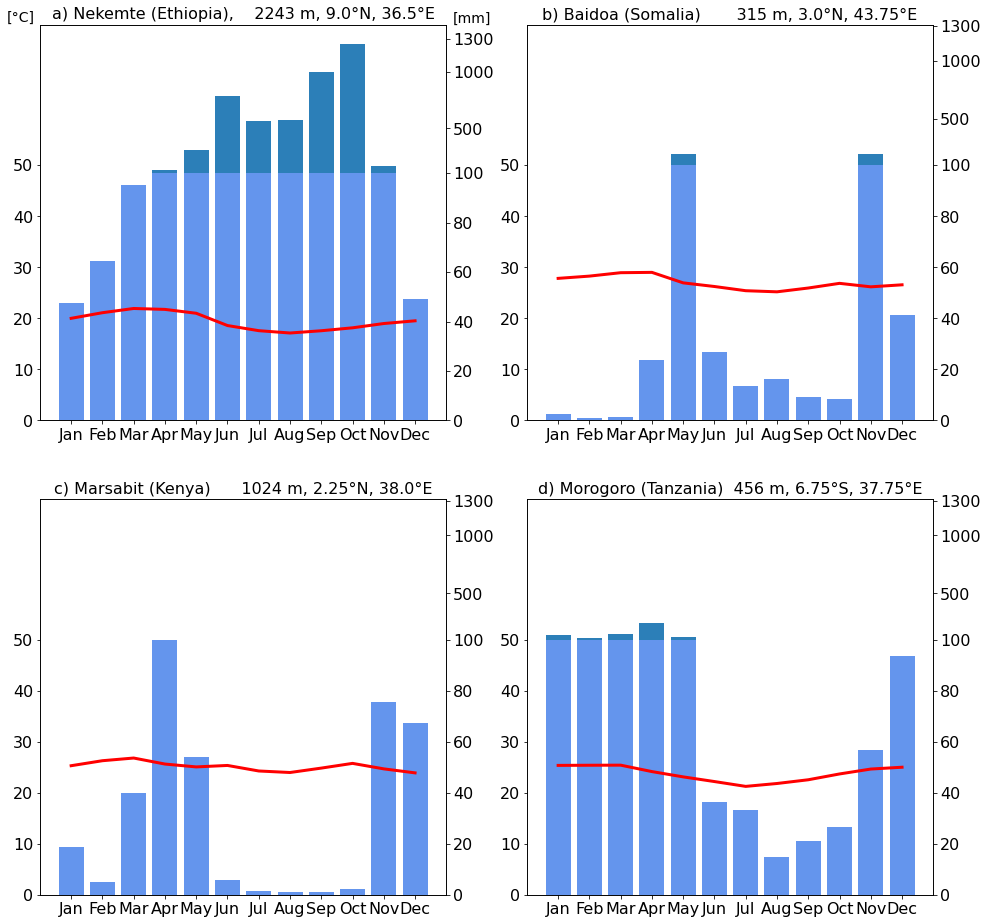

In [43]:
#Klimadiagramme (Fig. 3)
def scale(val, src, dst):   #Funktion, um die Daten korrekt zu stauchen
    return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]

Month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

source_scale = (100,1200)
destination_scale = (100,150)
fig,ax1 = plt.subplots(2,2,figsize=(16,16))

data_scaled1 = [x if x < 100 else scale(x, source_scale, destination_scale) for x in Data1]  #Stauchung der Daten ab 100 mm/monat
data_scaled2 = [x if x < 100 else scale(x, source_scale, destination_scale) for x in Data2]
data_scaled3 = [x if x < 100 else scale(x, source_scale, destination_scale) for x in Data3]
data_scaled4 = [x if x < 100 else scale(x, source_scale, destination_scale) for x in Data4]
data1_100=[x if x < 100 else 100 for x in Data1]
data2_100=[x if x < 100 else 100 for x in Data2]
data3_100=[x if x < 100 else 100 for x in Data3]
data4_100=[x if x < 100 else 100 for x in Data4]

ax2 = ax1[0,0].twinx()   #Erstellung der Zwillingsachse
ax3 = ax1[0,1].twinx()
ax4 = ax1[1,0].twinx()
ax5 = ax1[1,1].twinx()

ax2.plot(Datas1,color='red',linewidth=3)   #Nekemte
ax2.set_yticks([0,10,20,30,40,50])
ax2.axis(ymax=155/2)
ax1[0,0].bar(Month,height=data_scaled1,color='#2c7fb8')
ax1[0,0].bar(Month,height=data1_100,color='cornflowerblue')
ax1[0,0].axis(ymax=160,ymin=0)
ax1[0,0].yaxis.tick_right()
ax1[0,0].set_yticks([0,20,40,60,80,100,118.18181818181819,140.9090909090909,154.54545454545453])
ax1[0,0].set_yticklabels(["0","20","40","60","80","100","500","1000","1300"])
ax1[0,0].set_ylabel('[°C]',loc='top',labelpad=5,rotation=0,size=14)

ax3.plot(Datas2,color='red',linewidth=3)    #Baidoa
ax3.set_yticks([0,10,20,30,40,50])
ax3.axis(ymax=155/2)
ax1[0,1].bar(Month,height=data_scaled2,color='#2c7fb8')
ax1[0,1].bar(Month,height=data2_100,color='cornflowerblue')
ax1[0,1].axis(ymax=155,ymin=0)
ax1[0,1].yaxis.tick_right()
ax1[0,1].set_yticks([0,20,40,60,80,100,118.18181818181819,140.9090909090909,154.54545454545453])
ax1[0,1].set_yticklabels(["0","20","40","60","80","100","500","1000","1300"])

ax4.plot(Datas3,color='red',linewidth=3)     #Marsabit
ax4.set_yticks([0,10,20,30,40,50])
ax4.axis(ymax=155/2)
ax1[1,0].bar(Month,height=data_scaled3,color='#2c7fb8')
ax1[1,0].bar(Month,height=data3_100,color='cornflowerblue')
ax1[1,0].axis(ymax=155,ymin=0)
ax1[1,0].yaxis.tick_right()
ax1[1,0].set_yticks([0,20,40,60,80,100,118.18181818181819,140.9090909090909,154.54545454545453])
ax1[1,0].set_yticklabels(["0","20","40","60","80","100","500","1000","1300"])

ax5.plot(Datas4,color='red',linewidth=3)     #Morogoro
ax5.set_yticks([0,10,20,30,40,50])
ax5.axis(ymax=155/2)
ax1[1,1].bar(Month,height=data_scaled4,color='#2c7fb8')
ax1[1,1].bar(Month,height=data4_100,color='cornflowerblue')
ax1[1,1].axis(ymax=155,ymin=0)
ax1[1,1].yaxis.tick_right()
ax1[1,1].set_yticks([0,20,40,60,80,100,118.18181818181819,140.9090909090909,154.54545454545453])
ax1[1,1].set_yticklabels(["0","20","40","60","80","100","500","1000","1300"])

ax2.yaxis.tick_left()    #Aufhübschen der Graphen
ax2.set_ylabel('[mm]',y=1.035,labelpad=26,rotation=0,size=14)
ax3.yaxis.tick_left()
ax4.yaxis.tick_left()
ax5.yaxis.tick_left()
ax2.tick_params(labelsize=16)
ax3.tick_params(labelsize=16)
ax4.tick_params(labelsize=16)
ax5.tick_params(labelsize=16)
ax1[0,0].tick_params(labelsize=16)
ax1[1,0].tick_params(labelsize=16)
ax1[0,1].tick_params(labelsize=16)
ax1[1,1].tick_params(labelsize=16)
ax1[0,0].set_title('a) Nekemte (Ethiopia),    2243 m, 9.0°N, 36.5°E',size=16)
ax1[0,1].set_title('b) Baidoa (Somalia)       315 m, 3.0°N, 43.75°E',size=16)
ax1[1,0].set_title('c) Marsabit (Kenya)      1024 m, 2.25°N, 38.0°E',size=16)
ax1[1,1].set_title('d) Morogoro (Tanzania)  456 m, 6.75°S, 37.75°E',size=16)

In [95]:
hm=pd.read_csv('/Users/weber-j/Documents/Cluster_Telecon.csv',sep=';',index_col=0)
hm

IOD yr  IOD MAM  W-IOD yr  W-IOD MAM  E-IOD yr  E-IOD MAM  ENSO Nov-1  \
SST-1   0.074    0.217    -0.139     -0.067    -0.210     -0.232       0.021   
SST-2   0.072   -0.163    -0.293     -0.416    -0.360     -0.281      -0.467   
SST-3   0.245    0.337     0.644      0.724     0.392      0.449       0.607   
SST-4   0.018   -0.143     0.050     -0.054     0.032      0.057       0.023   
SST-5  -0.294   -0.232    -0.206     -0.188     0.087     -0.006      -0.272   
SST-6  -0.162   -0.225    -0.543     -0.612    -0.375     -0.426      -0.477   
SST-7  -0.042   -0.010    -0.327     -0.360    -0.280     -0.344      -0.243   
SST-8   0.068   -0.118    -0.368     -0.521    -0.429     -0.419      -0.490   
SST-9  -0.017    0.160     0.604      0.775     0.611      0.636       0.684   
wd-1   -0.078   -0.298    -0.001     -0.018     0.077      0.212       0.201   
wd-2   -0.077   -0.147    -0.020     -0.082     0.057      0.033      -0.047   
wd-3    0.029    0.220     0.005      0.014    -0.024     -0.156      -0.093   
wd-4   -0.102    0.017    -0.107      0.038    -0.004      0.024       0.078   
wd-5   -0.069   -0.101     0.194      0.212     0.259      0.285       0.414   
wd-6   -0.217    0.093     0.116      0.221     0.329      0.145      -0.103   
wd-7    0.264    0.271    -0.304     -0.368    -0.560     -0.569      -0.429   
wd-8   -0.022   -0.175    -0.076     -0.152    -0.053     -0.014      -0.178   
wd-9    0.223    0.083     0.252      0.189     0.029      0.122       0.183   
tp-1   -0.340   -0.199    -0.345     -0.162    -0.005     -0.006       0.045   
tp-2   -0.102    0.008    -0.249     -0.249    -0.144     -0.250      -0.307   
tp-3   -0.016   -0.212     0.145     -0.031     0.158      0.133      -0.116   
tp-4    0.265    0.146     0.222      0.229    -0.044      0.111       0.270   
tp-5    0.085    0.157     0.236      0.190     0.149      0.064       0.136   
tp-6    0.085    0.157     0.236      0.190     0.149      0.064       0.136   
tp-7   -0.002   -0.039    -0.055     -0.090    -0.052     -0.058      -0.123   
tp-8    0.078    0.169     0.130      0.158     0.051      0.025       0.202   
tp-9    0.067    0.004    -0.090     -0.179    -0.155     -0.178      -0.327   
tp-10   0.320    0.227     0.220      0.207    -0.100      0.028       0.284   
tp-11  -0.270   -0.245    -0.253     -0.183     0.018      0.010      -0.144   

       ENSO Dec-1  ENSO Jan  ENSO Feb  ENSO Mar  ENSO Apr  ENSO May  PDO Mar  \
SST-1       0.051     0.027    -0.026     0.021    -0.007    -0.047    0.092   
SST-2      -0.459    -0.428    -0.401    -0.422    -0.344    -0.230   -0.090   
SST-3       0.569     0.538     0.510     0.474     0.430     0.297    0.174   
SST-4       0.055     0.007     0.002     0.030    -0.012    -0.095   -0.192   
SST-5      -0.342    -0.343    -0.347    -0.355    -0.444    -0.482   -0.223   
SST-6      -0.452    -0.456    -0.429    -0.392    -0.270    -0.113   -0.142   
SST-7      -0.214    -0.227    -0.225    -0.212    -0.183    -0.026   -0.045   
SST-8      -0.451    -0.390    -0.343    -0.325    -0.171     0.011   -0.175   
SST-9       0.659     0.672     0.658     0.623     0.496     0.302    0.309   
wd-1        0.175     0.136     0.106     0.095     0.002    -0.067    0.074   
wd-2       -0.033     0.002     0.042     0.023     0.028     0.093   -0.076   
wd-3       -0.127    -0.143    -0.116    -0.121    -0.165    -0.169    0.004   
wd-4        0.106     0.185     0.214     0.195     0.275     0.308   -0.007   
wd-5        0.474     0.505     0.521     0.537     0.575     0.524    0.314   
wd-6       -0.153    -0.142    -0.133    -0.146    -0.198    -0.310    0.047   
wd-7       -0.396    -0.419    -0.440    -0.419    -0.348    -0.206   -0.290   
wd-8       -0.144    -0.158    -0.153    -0.175    -0.121    -0.093   -0.052   
wd-9        0.153     0.129     0.085     0.129     0.128     0.123    0.018   
tp-1        0.090     0.075     0.066     0.061     0.008    -0.061    0.365   
tp-2  

[Text(1, -1.0, '-1'),
 Text(1, -0.66, '-0.67'),
 Text(1, -0.32, '-0.33'),
 Text(1, 0.0, '0'),
 Text(1, 0.32, '0.33'),
 Text(1, 0.66, '0.67'),
 Text(1, 1.0, '1')]

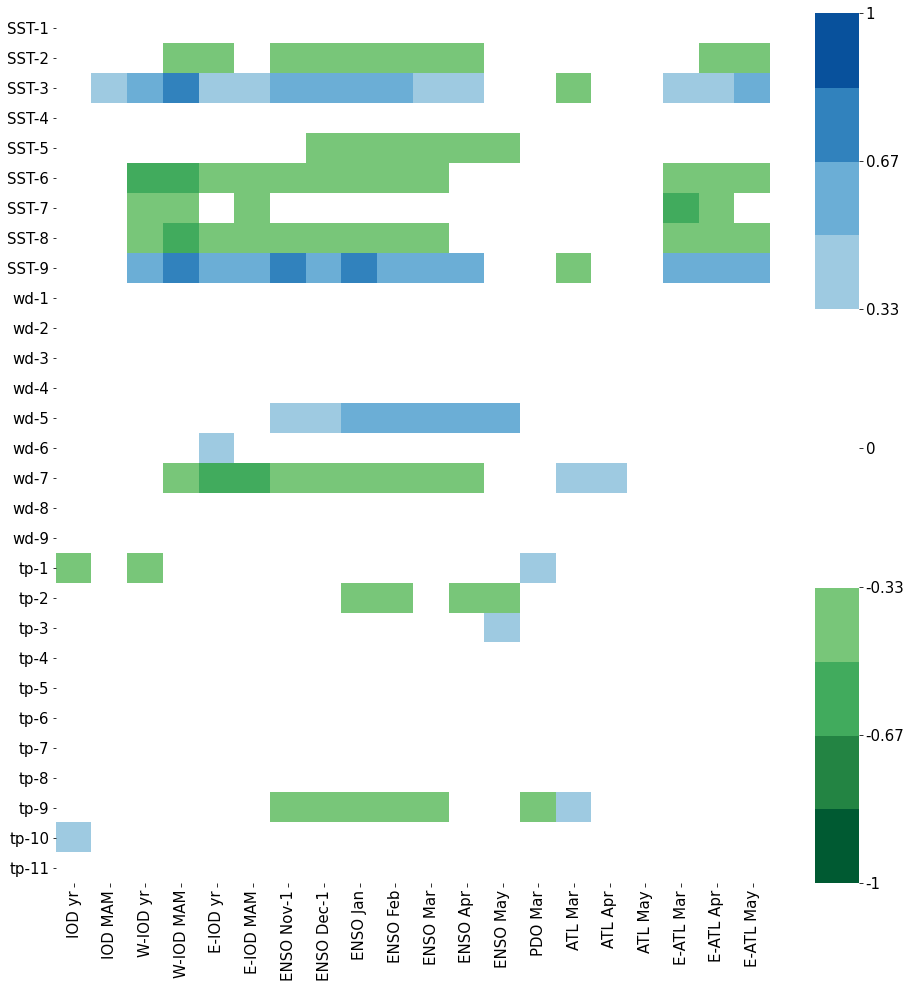

In [216]:
#Heatmap der Korrelationen zwischen den Teleconnection und der Clusterhäufigkeit (Fig. 17)
coll=['#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#005a32','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#238443','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#41ab5d','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#78c679','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#ffffff','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#6baed6','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#3182bd','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c','#08519c']
plt.subplots(figsize=(16,16))
ax=sns.heatmap(hm,annot=False,cmap=coll,vmin=-1,vmax=1,cbar_kws={'ticks':(-1,-0.67,-0.33,0,0.33,0.67,1)})  #Colorbarbeschriftungsorte
plt.tick_params(labelsize=15,labelrotation=0)
plt.xticks(rotation=90)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_yticklabels(['-1','-0.67','-0.33','0','0.33','0.67','1'])

In [210]:
hm2=pd.read_csv('/Users/weber-j/Documents/tp_telecon.csv',sep=';',index_col=0)
hm2

MJO   IOD MAM  W-IOD Mar  W-IOD Apr  W-IOD May  E-IOD Mar  \
Burundi       0.271367 -0.030791  -0.075307  -0.178806  -0.204548  -0.068050   
Djibouti      0.207202  0.021733  -0.134863  -0.258256  -0.210657  -0.159899   
Eritrea       0.172337  0.111574   0.011423  -0.119863  -0.084223  -0.075971   
Ethiopia      0.317123 -0.047307   0.024619  -0.096632  -0.156715   0.004114   
Kenya         0.331066 -0.074411   0.067731  -0.037013  -0.205180   0.006551   
Rwanda        0.334053 -0.125562  -0.137629  -0.228429  -0.307032  -0.089740   
Somalia       0.375784 -0.067113   0.058258  -0.097023  -0.226623   0.007629   
Tanzania      0.036512  0.026472  -0.085825  -0.193691  -0.218993  -0.184110   
South Sudan   0.249489 -0.282032  -0.436423  -0.504456  -0.494299  -0.239567   
Sudan         0.109053 -0.210900  -0.357932  -0.391171  -0.302319  -0.159880   
Uganda        0.246496 -0.141875  -0.149004  -0.255991  -0.314131  -0.101293   
Indian Ocean  0.218007 -0.158698   0.045944  -0.023148  -0.173717   0.129631   
Area          0.228254 -0.025667   0.067076  -0.038473  -0.179841   0.032210   

              E-IOD Apr  E-IOD May  ENSO Nov-1  ENSO Dez-1  ...  ENSO Mar  \
Burundi       -0.103492  -0.229424   -0.182501   -0.166494  ... -0.124408   
Djibouti      -0.250781  -0.244125   -0.066390   -0.006094  ... -0.018295   
Eritrea       -0.167640  -0.200400    0.087978    0.110516  ...  0.102679   
Ethiopia      -0.048100  -0.084131   -0.065352   -0.044273  ... -0.021346   
Kenya          0.029217  -0.046106   -0.153938   -0.152871  ... -0.182653   
Rwanda        -0.090565  -0.224408   -0.216522   -0.214021  ... -0.173527   
Somalia       -0.056109  -0.070838    0.014746    0.015666  ... -0.020822   
Tanzania      -0.153245  -0.214923   -0.332983   -0.342183  ... -0.325852   
South Sudan   -0.275183  -0.304094   -0.314318   -0.276649  ... -0.269645   
Sudan         -0.212692  -0.220683   -0.139917   -0.076412  ... -0.111979   
Uganda        -0.111959  -0.197826   -0.236235   -0.231241  ... -0.198078   
Indian Ocean   0.064726  -0.008829   -0.020359   -0.052032  ... -0.027547   
Area          -0.031311  -0.105014   -0.072637   -0.084282  ... -0.090882   

              ENSO Apr  ENSO May   PDO May   ATL May   ATL Apr  ATL May.1  \
Burundi      -0.204096 -0.166599 -0.061836 -0.047215 -0.003836   0.144821   
Djibouti     -0.040455  0.058764 -0.059110 -0.077905  0.163194  -0.040205   
Eritrea       0.042259  0.074198  0.041484 -0.055539  0.127566   0.067797   
Ethiopia     -0.072723 -0.044125 -0.036669 -0.187258  0.059891  -0.029156   
Kenya        -0.276129 -0.318224 -0.170432 -0.054971 -0.014885   0.070956   
Rwanda       -0.289495 -0.262246 -0.109453 -0.004864 -0.008470   0.158639   
Somalia      -0.101533 -0.140664 -0.047847 -0.152789 -0.090832   0.024716   
Tanzania     -0.376334 -0.365527 -0.251957  0.283470  0.200816   0.137848   
South Sudan  -0.349031 -0.318866  0.108542 -0.129111  0.286885   0.219203   
Sudan        -0.131469 -0.082322  0.152317 -0.222019  0.211232   0.184373   
Uganda       -0.301851 -0.309037 -0.081522  0.017897  0.196206   0.072734   
Indian Ocean -0.041811 -0.002683  0.129681 -0.225979 -0.070542   0.079881   
Area         -0.192144 -0.240218  0.089337 -0.038087  0.134674   0.097538   

              E-ATL Mar  E-ATL Apr  E-ATL May  
Burundi       -0.032846  -0.066371   0.064165  
Djibouti      -0.118766  -0.187370  -0.143845  
Eritrea       -0.071391  -0.086527  -0.043416  
Ethiopia      -0.076620  -0.102750  -0.076768  
Kenya          0.063194   0.087003   0.058233  
Rwanda        -0.109301  -0.085399  -0.033939  
Somalia       -0.078762  -0.100919  -0.141333  
Tanzania      -0.044677   0.075771   0.185385  
South Sudan   -0.307349  -0.439709  -0.220722  
Sudan         -0.325473  -0.410328  -0.202712  
Uganda        -0.095734  -0.078682   0.025886  
Indian Ocean  -0.042254  -0.119102  -0.190063  
Area           0.031077  -0.007434   0.061878  

[13 rows x 22 columns]

[Text(1, -1.0, '-1'),
 Text(1, -0.67, '-0.67'),
 Text(1, -0.33, '-0.33'),
 Text(1, 0.0, '0'),
 Text(1, 0.33, '0.33'),
 Text(1, 0.67, '0.67'),
 Text(1, 1.0, '1')]

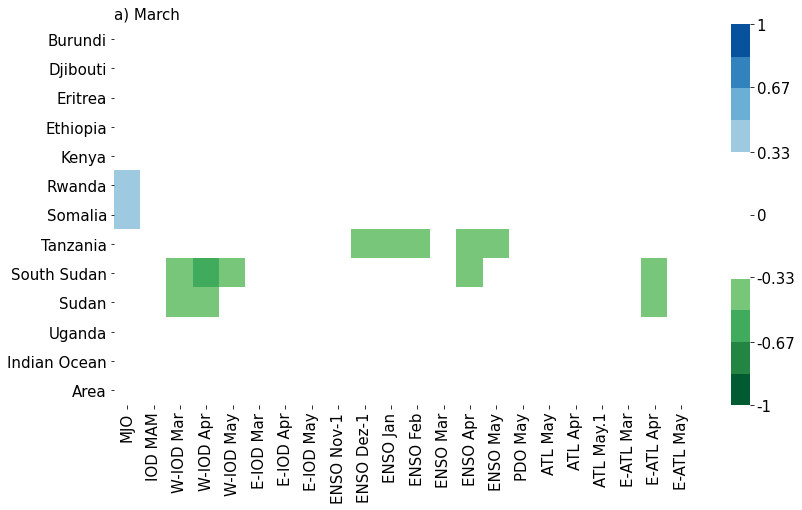

In [23]:
#Test einer Heatmap der Korrelationen der Länderniederschläge und der Teleconnections, nicht mit in die Arbeit aufgenommen
coll=['#005a32','#238443','#41ab5d','#78c679','#ffffff','#ffffff','#ffffff','#ffffff','#9ecae1','#6baed6','#3182bd','#08519c']
plt.subplots(figsize=(13,7))
ax=sns.heatmap(hm2,annot=False,cmap=coll,vmin=-1,vmax=1,cbar_kws={'ticks':(-1,-0.67,-0.33,0,0.33,0.67,1)})
plt.tick_params(labelsize=15,labelrotation=0)
plt.xticks(rotation=90)
plt.title('a) March',loc='left',size=15)
cbar = ax.collections[0].colorbar
#cbar = fig.colorbar(ticks=[-1, 0, 1])
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_yticklabels(['-1','-0.67','-0.33','0','0.33','0.67','1'])

'cbar8.ax.tick_params(labelsize=20) \ncbar9.ax.tick_params(labelsize=20) \ncbar10.ax.tick_params(labelsize=20) '

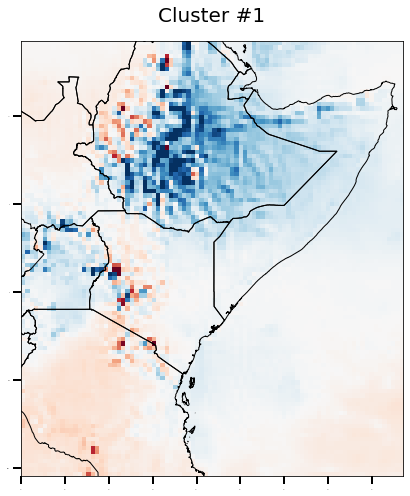

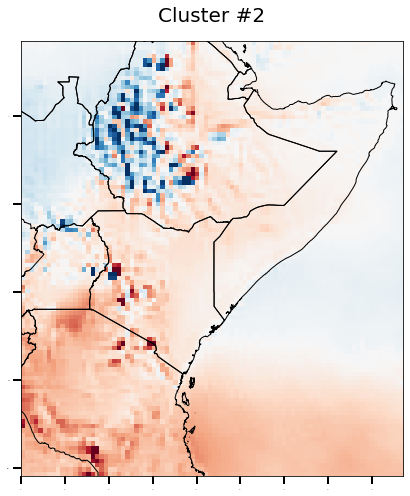

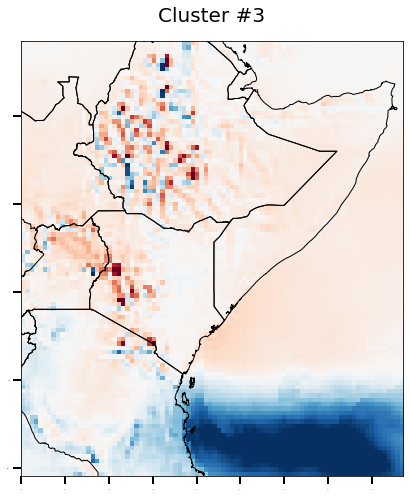

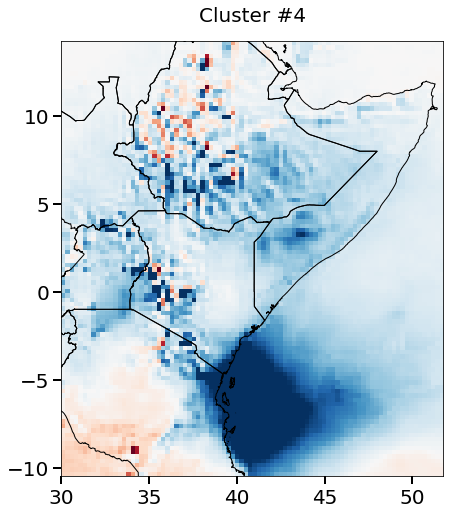

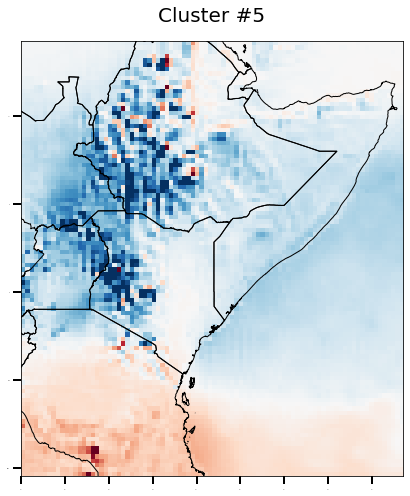

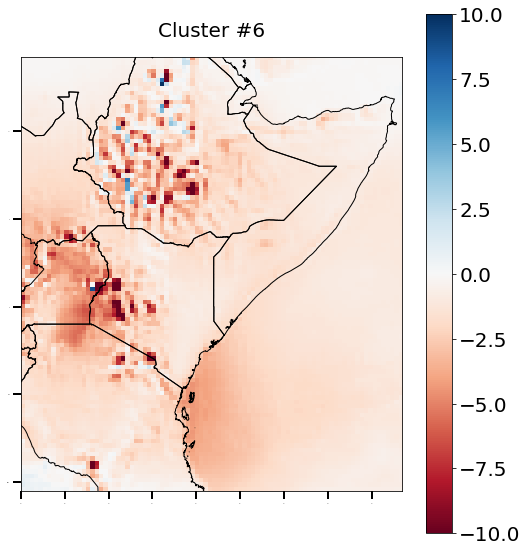

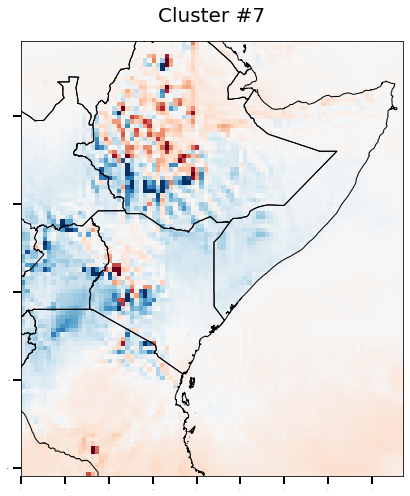

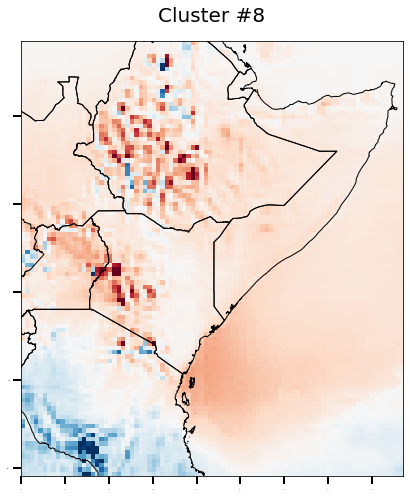

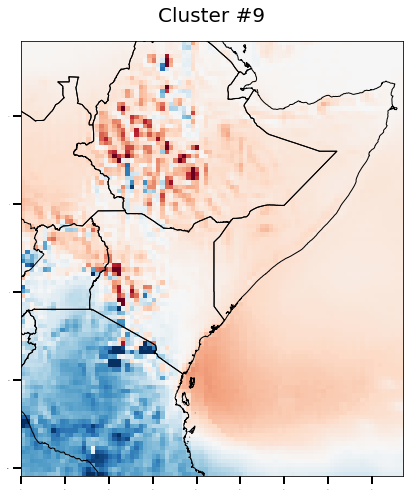

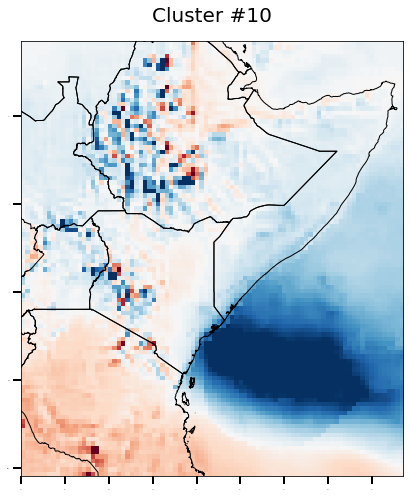

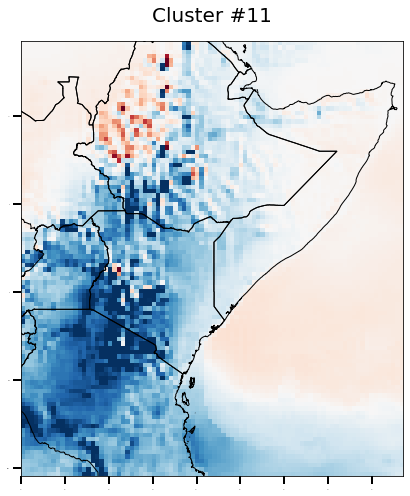

In [402]:
#Darstellung aller tp-Clustercentroide (Fig. 10)
gdd=xr.open_dataset('/Users/weber-j/Documents/Mean_tp.nc')  #Durchschnittlicher Niederschlag während der MAM-Season, 1980–2018
clu=xr.open_dataset('/Users/weber-j/Documents/Cluster-Ergebnisse/em_cnt_v106.nc')   #Ergebnisfile der Clusterung, enthält die Centroide
li=[]
gdf=gdd.tp
td=np.asarray(gdd.tp)
for i in range(0,100):
    li.append(td[99-i])  #Wenn das Clustercentroid geplottet wird steht es auf dem Kopf, deswegen stelle ich alles erstmal auf dem
                         # Kopf dar und drehe es dann
top_left_lon=30.0  #Rahmen des Untersuchungsgebietes
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')  #Shapefiles der Länder
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)


gdf=clu.cent[0][0]-li
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][1]-li
ax3 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax3.tick_params(labelsize=0,size=8,width=2)
pos3=ax3.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][2]-li
ax4 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax4.tick_params(labelsize=0,size=8,width=2)
pos4=ax4.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][3]-li
ax5 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax5.tick_params(labelsize=20,size=8,width=2)
pos5=ax5.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][4]-li
ax6 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax6.tick_params(labelsize=0,size=8,width=2)
pos6=ax6.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][5]-li
ax7 = sf.plot(edgecolor='black', facecolor='none',figsize=(8.55,9.55))
ax7.tick_params(labelsize=0,size=8,width=2)
pos7=ax7.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][6]-li
ax8 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax8.tick_params(labelsize=0,size=8,width=2)
pos8=ax8.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][7]-li
ax9 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax9.tick_params(labelsize=0,size=8,width=2)
pos9=ax9.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][8]-li
ax10 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax10.tick_params(labelsize=0,size=8,width=2)
pos10=ax10.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][9]-li
ax11 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax11.tick_params(labelsize=0,size=8,width=2)
pos11=ax11.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][10]-li
ax12 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax12.tick_params(labelsize=0,size=8,width=2)
pos12=ax12.imshow(gdf,vmin=-10,vmax=10,cmap='RdBu',extent=extent_mat)

mpl.axes._axes.Axes.invert_yaxis(ax2)
mpl.axes._axes.Axes.invert_yaxis(ax3)
mpl.axes._axes.Axes.invert_yaxis(ax4)
mpl.axes._axes.Axes.invert_yaxis(ax5)
mpl.axes._axes.Axes.invert_yaxis(ax6)
mpl.axes._axes.Axes.invert_yaxis(ax7)
mpl.axes._axes.Axes.invert_yaxis(ax8)
mpl.axes._axes.Axes.invert_yaxis(ax9)
mpl.axes._axes.Axes.invert_yaxis(ax10)
mpl.axes._axes.Axes.invert_yaxis(ax11)
mpl.axes._axes.Axes.invert_yaxis(ax12)
ax2.set_title('Cluster #1',size=20,pad=20)
ax3.set_title('Cluster #2',size=20,pad=20)
ax4.set_title('Cluster #3',size=20,pad=20)
ax5.set_title('Cluster #4',size=20,pad=20)
ax6.set_title('Cluster #5',size=20,pad=20)
ax7.set_title('Cluster #6',size=20,pad=20)
ax8.set_title('Cluster #7',size=20,pad=20)
ax9.set_title('Cluster #8',size=20,pad=20)
ax10.set_title('Cluster #9',size=20,pad=20)
ax11.set_title('Cluster #10',size=20,pad=20)
ax12.set_title('Cluster #11',size=20,pad=20)
'''cbar2=fig.colorbar(pos2, ax=ax2)
cbar3=fig.colorbar(pos3, ax=ax3)
cbar4=fig.colorbar(pos4, ax=ax4)
cbar5=fig.colorbar(pos5, ax=ax5)
cbar6=fig.colorbar(pos6, ax=ax6)'''
cbar7=fig.colorbar(pos7, ax=ax7)
'''
cbar8=fig.colorbar(pos8, ax=ax8)
cbar9=fig.colorbar(pos9, ax=ax9)
cbar10=fig.colorbar(pos10, ax=ax10)
cbar2.ax.tick_params(labelsize=20) 
cbar3.ax.tick_params(labelsize=20) 
cbar4.ax.tick_params(labelsize=20) 
cbar5.ax.tick_params(labelsize=20) 
cbar6.ax.tick_params(labelsize=20)'''
cbar7.ax.tick_params(labelsize=20) 
'''cbar8.ax.tick_params(labelsize=20) 
cbar9.ax.tick_params(labelsize=20) 
cbar10.ax.tick_params(labelsize=20) '''

'cbar8.ax.tick_params(labelsize=20) \ncbar9.ax.tick_params(labelsize=20) \ncbar10.ax.tick_params(labelsize=20) '

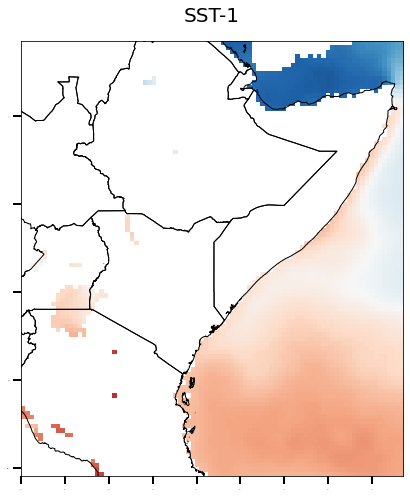

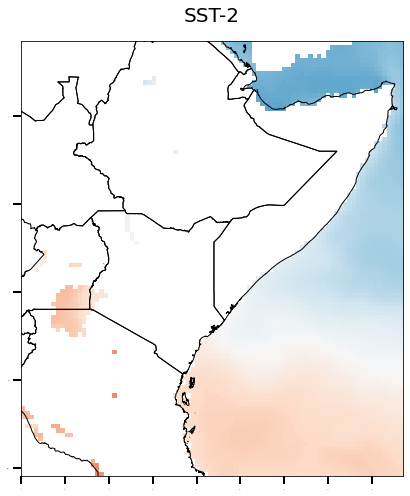

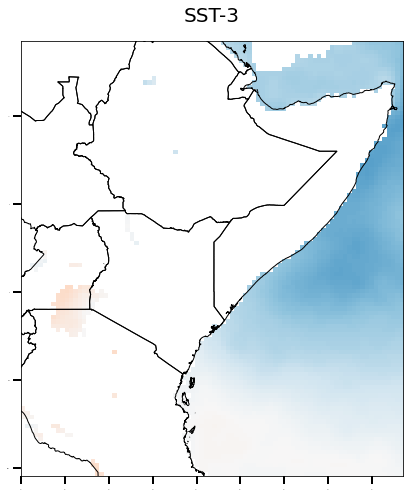

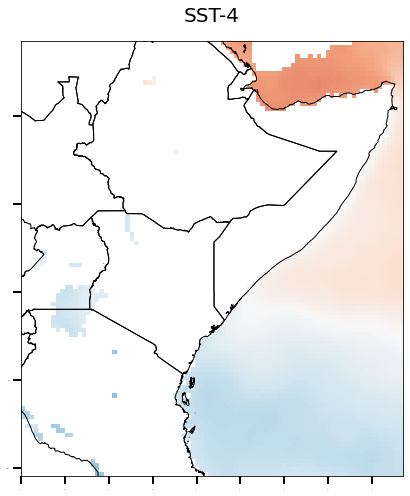

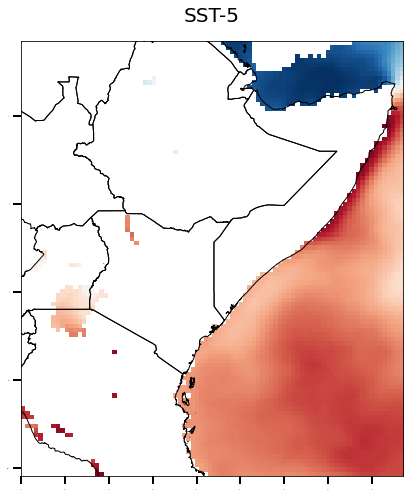

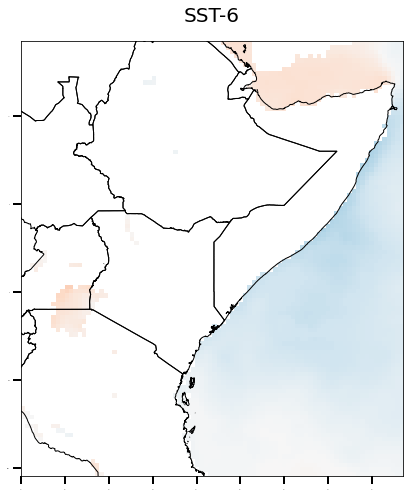

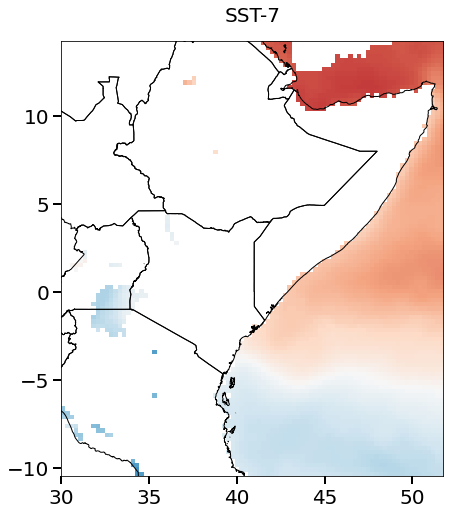

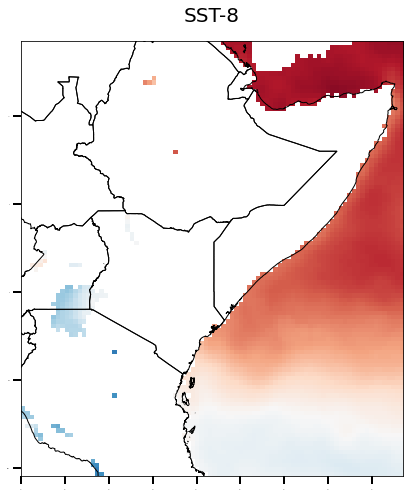

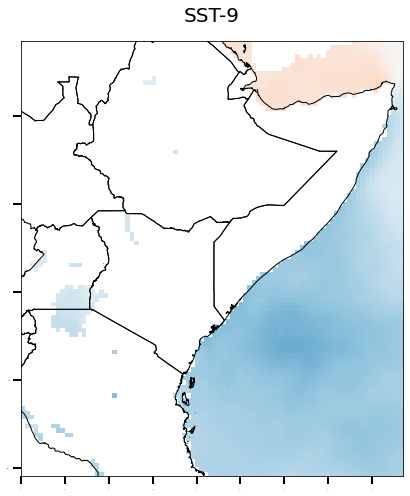

In [68]:
#SST-Cluster visualisieren
gdd=xr.open_dataset('/Users/weber-j/Documents/Mean_SST.nc')
clu=xr.open_dataset('/Users/weber-j/Documents/Cluster-Ergebnisse/em_cnt_v117.nc')
li=[]
gdf=gdd.sst
td=np.asarray(gdd.sst)
for i in range(0,100):
    li.append(td[99-i])
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
#ax1 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
#xa[0,0].plot(pos2)

gdf=clu.cent[0][0]-li
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][1]-li
ax3 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax3.tick_params(labelsize=0,size=8,width=2)
pos3=ax3.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][2]-li
ax4 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax4.tick_params(labelsize=0,size=8,width=2)
pos4=ax4.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][3]-li
ax5 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax5.tick_params(labelsize=0,size=8,width=2)
pos5=ax5.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][4]-li
ax6 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax6.tick_params(labelsize=0,size=8,width=2)
pos6=ax6.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][5]-li
ax7 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax7.tick_params(labelsize=0,size=8,width=2)
pos7=ax7.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][6]-li
ax8 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax8.tick_params(labelsize=20,size=8,width=2)
pos8=ax8.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][7]-li
ax9 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax9.tick_params(labelsize=0,size=8,width=2)
pos9=ax9.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)
gdf=clu.cent[0][8]-li
ax10 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax10.tick_params(labelsize=0,size=8,width=2)
pos10=ax10.imshow(gdf,vmin=-2.7,vmax=2.7,cmap='RdBu',extent=extent_mat)

mpl.axes._axes.Axes.invert_yaxis(ax2)
mpl.axes._axes.Axes.invert_yaxis(ax3)
mpl.axes._axes.Axes.invert_yaxis(ax4)
mpl.axes._axes.Axes.invert_yaxis(ax5)
mpl.axes._axes.Axes.invert_yaxis(ax6)
mpl.axes._axes.Axes.invert_yaxis(ax7)
mpl.axes._axes.Axes.invert_yaxis(ax8)
mpl.axes._axes.Axes.invert_yaxis(ax9)
mpl.axes._axes.Axes.invert_yaxis(ax10)
ax2.set_title('SST-1',size=20,pad=20)
ax3.set_title('SST-2',size=20,pad=20)
ax4.set_title('SST-3',size=20,pad=20)
ax5.set_title('SST-4',size=20,pad=20)
ax6.set_title('SST-5',size=20,pad=20)
ax7.set_title('SST-6',size=20,pad=20)
ax8.set_title('SST-7',size=20,pad=20)
ax9.set_title('SST-8',size=20,pad=20)
ax10.set_title('SST-9',size=20,pad=20)
'''cbar2=fig.colorbar(pos2, ax=ax2)
cbar3=fig.colorbar(pos3, ax=ax3)
cbar4=fig.colorbar(pos4, ax=ax4)
cbar5=fig.colorbar(pos5, ax=ax5)
cbar6=fig.colorbar(pos6, ax=ax6)'''
#cbar4=fig.colorbar(pos4, ax=ax4)
'''
cbar8=fig.colorbar(pos8, ax=ax8)
cbar9=fig.colorbar(pos9, ax=ax9)
cbar10=fig.colorbar(pos10, ax=ax10)
cbar2.ax.tick_params(labelsize=20) 
cbar3.ax.tick_params(labelsize=20) 
cbar4.ax.tick_params(labelsize=20) 
cbar5.ax.tick_params(labelsize=20) 
cbar6.ax.tick_params(labelsize=20)'''
#cbar4.ax.tick_params(labelsize=20) 
'''cbar8.ax.tick_params(labelsize=20) 
cbar9.ax.tick_params(labelsize=20) 
cbar10.ax.tick_params(labelsize=20) '''

In [238]:
#Durchschn. Temperatur des Gebietes auf Pixelbasis pro Tag
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))

Grd=[]
for Tag in range (0,92):
    for Jahr in range (0,39):
        t=Jahr*365+60
        sch=int((Jahr)/4)   #Schaltjahr
        day=t+sch+Tag
        if Tag == 0:
            gd=gdf.t2m[day]-273.15
        else:
            gd=gd+gdf.t2m[day]-273.15
    gd=gd/39
    Grd.append(np.asarray(gd))

#Berechnung Daily Temperatur Index (Wie der DWI (s.u.), nur mit der Temp)
dat=pd.read_csv('/Users/weber-j/Documents/Masterarbeit/Daten/Regendaten nach Ländern.csv',sep=';')
TWetness=[]
gdf=xr.open_dataset('/Users/weber-j/Documents/t2m_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))
    
for Cl in range (1,10):
    cnt=0
    Gru=Grd[Tag]*0
    for Tag in range (0,92):
        count=0
        for Jahr in range (0,39):
            day=Jahr*92+Tag
            if dat.SST_Cluster[day]==Cl:
                t=Jahr*365+60
                sch=int((Jahr)/4)
                t=t+sch+Tag
                count=count+1
                cnt=cnt+1
                if cnt==1:
                    wet=gdf.t2m[t]-237.15
                else:
                    wet=wet+gdf.t2m[t]-237.15
        if count > 0:
            Grund=Grd[Tag]*count
            Gru=Gru+Grund
    TWetness.append(np.asarray(Gru/wet))
print('Fertig')

Fertig


In [233]:
#Durchschn. Niederschlag des Gebietes auf Pixelbasis pro Tag
gdf=xr.open_dataset('/Users/weber-j/Documents/tp_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:   #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))

Grd=[]
for Tag in range (0,92):
    for Jahr in range (0,39):
        t=Jahr*365+60
        sch=int((Jahr)/4)   #Schaltjahr
        day=t+sch+Tag
        if Tag == 0:
            gd=gdf.tp[day]
        else:
            gd=gd+gdf.tp[day]
    gd=gd/39
    Grd.append(np.asarray(gd))
print('schluss nun')

schluss nun


In [234]:
#Berechnung des Daily Wetness Index
dat=pd.read_csv('/Users/weber-j/Documents/Masterarbeit/Daten/Regendaten nach Ländern.csv',sep=';')
Wetness=[]
gdf=xr.open_dataset('/Users/weber-j/Documents/tp_all.nc')
if len(gdf.time) < 15000 and len(gdf.time) > 14900:           #Regendaten sind kaputt (1979 doppelt drin), geht nur so
    gdf=gdf.isel(longitude=slice(0,88),time=slice(687,15000))
else:
    gdf=gdf.isel(longitude=slice(0,88),time=slice(365,15000))

for Cl in range (1,12):
    cnt=0
    Gru=Grd[Tag]*0
    for Tag in range (0,92):
        count=0
        for Jahr in range (0,39):
            day=Jahr*92+Tag
            if dat.tp_Cluster[day]==Cl:    #Um nicht alles mehrfach hintereinander zu schreiben, hab ich zur Berechnung lediglich in 
                t=Jahr*365+60              # dieser Zeile wr900, tp und SST ausgetauscht
                sch=int((Jahr)/4)
                t=t+sch+Tag
                count=count+1
                cnt=cnt+1
                if cnt==1:
                    wet=gdf.tp[t]
                else:
                    wet=wet+gdf.tp[t]
        if count > 0:
            Grund=Grd[Tag]*count
            Gru=Gru+Grund
    Wetness.append(np.asarray(Gru/wet))

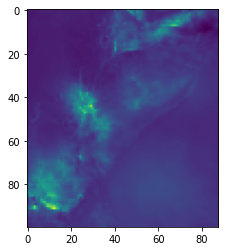

In [414]:
plt.imshow(Wetness[1])

In [235]:
for i in range (0,10):
    print(np.median(Wetness[i]))

1.0600231
1.5638161
1.2974017
0.71601987
0.7539147
2.3487566
1.2073667
1.4249568
1.3486345
0.88455224


In [236]:
#Um den Wetnessindex in der Grafik gut darstellen zu können, muss ich ihn umrechnen, ansonsten ist die Trockenheit komplett 
#überdimensioniert. Durch die Anpassung der Colorbar wird sichergestellt, dass die Werte richtig dargestellt werden
for w in range(0,9):
    for la in range (0,100):
        for lo in range (0,88):
            if Wetness[w][la,lo] < 1:
                Wetness[w][la,lo]=-1/Wetness[w][la,lo]+2

In [237]:
#Drehen der DWI-Daten, damit ich einfach die Form von oben übernehmen kann
Tra=[]
for k in range(0,len(Wetness)):
    trans=[]
    for j in range(0,len(Wetness[0])):
        Trans=[]
        for h in range (0,len(Wetness[0][0])):
            ja=99-j
            Trans.append(Wetness[k][ja][h])
        trans.append(Trans)
    Tra.append(trans)

In [239]:
#Das gleiche für die DTI-Daten
for w in range(0,9):
    for la in range (0,100):
        for lo in range (0,88):
            if TWetness[w][la,lo] < 1:
                TWetness[w][la,lo]=-1/TWetness[w][la,lo]+2

TraT=[]
for k in range(0,len(TWetness)):
    trans=[]
    for j in range(0,len(TWetness[0])):
        Trans=[]
        for h in range (0,len(TWetness[0][0])):
            ja=99-j
            Trans.append(TWetness[k][ja][h])
        trans.append(Trans)
    TraT.append(trans)

'cbar8.ax.tick_params(labelsize=20) \ncbar9.ax.tick_params(labelsize=20) \ncbar10.ax.tick_params(labelsize=20) '

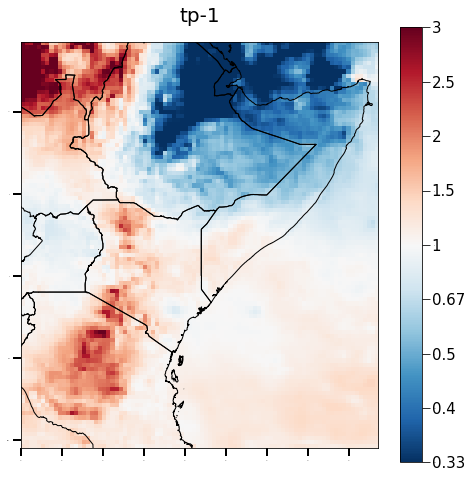

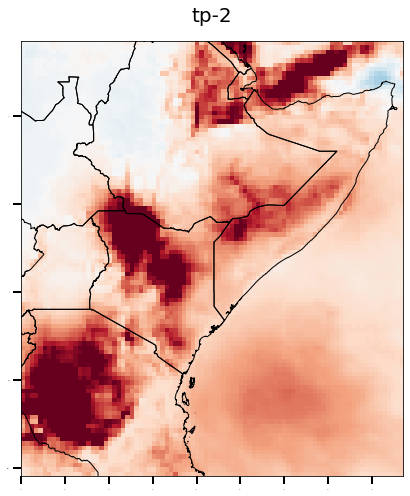

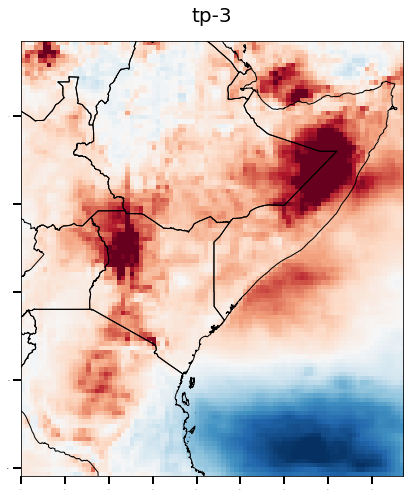

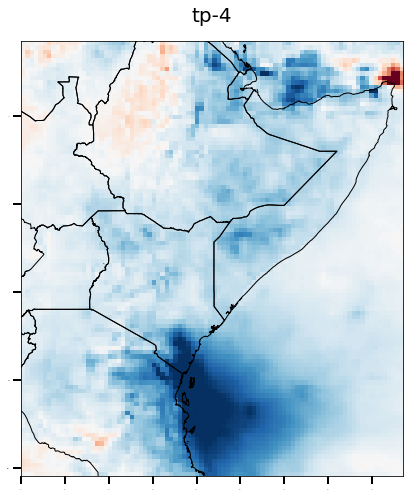

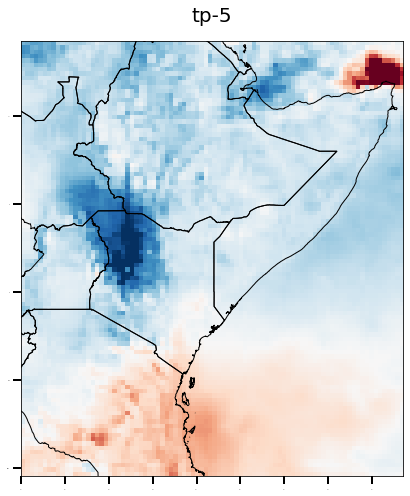

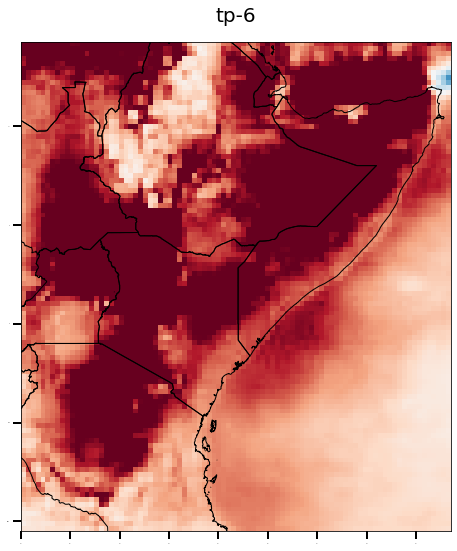

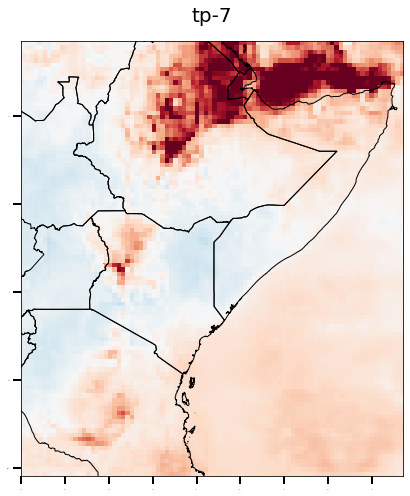

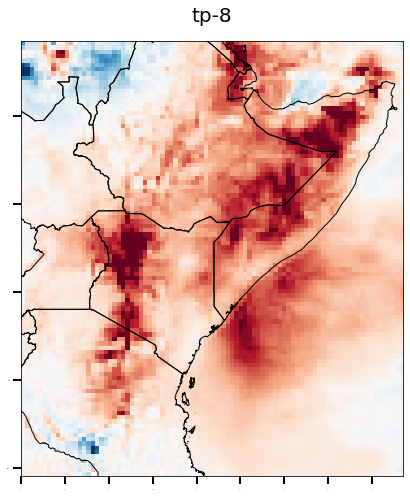

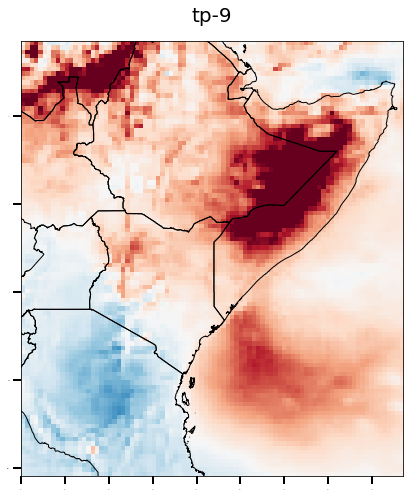

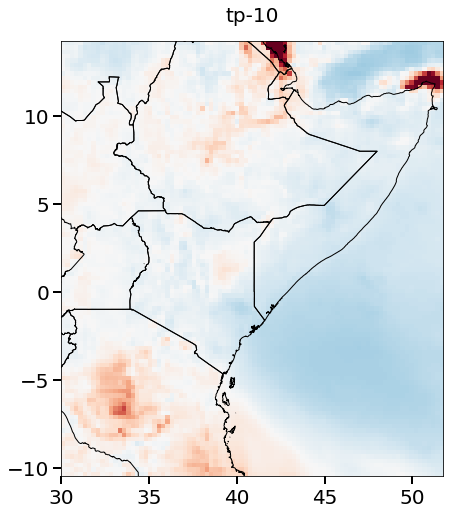

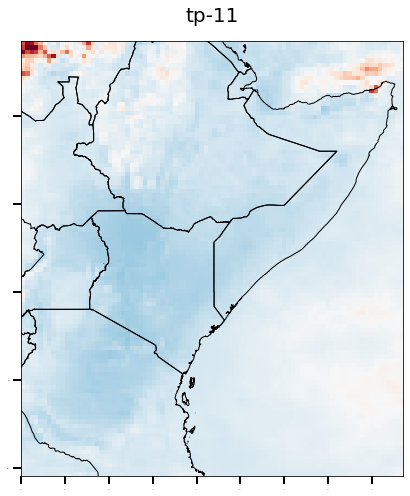

In [240]:
#Darstellung des Daily Wetness Index der Regencluster (Fig. 11)

gdf=Tra[0]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[1]
ax3 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax3.tick_params(labelsize=0,size=8,width=2)
pos3=ax3.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[2]
ax4 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax4.tick_params(labelsize=0,size=8,width=2)
pos4=ax4.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[3]
ax5 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax5.tick_params(labelsize=0,size=8,width=2)
pos5=ax5.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[4]
ax6 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax6.tick_params(labelsize=0,size=8,width=2)
pos6=ax6.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[5]
ax7 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
ax7.tick_params(labelsize=0,size=8,width=2)
pos7=ax7.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[6]
ax8 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax8.tick_params(labelsize=0,size=8,width=2)
pos8=ax8.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[7]
ax9 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax9.tick_params(labelsize=0,size=8,width=2)
pos9=ax9.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[8]
ax10 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax10.tick_params(labelsize=0,size=8,width=2)
pos10=ax10.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[9]
ax11 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax11.tick_params(labelsize=20,size=8,width=2)
pos11=ax11.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[10]
ax12 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax12.tick_params(labelsize=0,size=8,width=2)
pos12=ax12.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
mpl.axes._axes.Axes.invert_yaxis(ax2)
mpl.axes._axes.Axes.invert_yaxis(ax3)
mpl.axes._axes.Axes.invert_yaxis(ax4)
mpl.axes._axes.Axes.invert_yaxis(ax5)
mpl.axes._axes.Axes.invert_yaxis(ax6)
mpl.axes._axes.Axes.invert_yaxis(ax7)
mpl.axes._axes.Axes.invert_yaxis(ax8)
mpl.axes._axes.Axes.invert_yaxis(ax9)
mpl.axes._axes.Axes.invert_yaxis(ax10)
mpl.axes._axes.Axes.invert_yaxis(ax11)
mpl.axes._axes.Axes.invert_yaxis(ax12)
ax2.set_title('tp-1',size=20,pad=20)
ax3.set_title('tp-2',size=20,pad=20)
ax4.set_title('tp-3',size=20,pad=20)
ax5.set_title('tp-4',size=20,pad=20)
ax6.set_title('tp-5',size=20,pad=20)
ax7.set_title('tp-6',size=20,pad=20)
ax8.set_title('tp-7',size=20,pad=20)
ax9.set_title('tp-8',size=20,pad=20)
ax10.set_title('tp-9',size=20,pad=20)
ax11.set_title('tp-10',size=20,pad=20)
ax12.set_title('tp-11',size=20,pad=20)
'''cbar2=fig.colorbar(pos2, ax=ax2)
cbar3=fig.colorbar(pos3, ax=ax3)
cbar4=fig.colorbar(pos4, ax=ax4)
cbar5=fig.colorbar(pos5, ax=ax5)
cbar6=fig.colorbar(pos6, ax=ax6)'''
cbar2=fig.colorbar(pos2, ax=ax2)
cbar2.ax.tick_params(labelsize=0,size=8)
cbar2.ax.text(4.8, 2.95,3,size=15)
cbar2.ax.text(4.8, 2.45,2.5,size=15)
cbar2.ax.text(4.8, 1.95,2,size=15)
cbar2.ax.text(4.8, 1.45,1.5,size=15)
cbar2.ax.text(4.8, 0.95,1,size=15)
cbar2.ax.text(4.8, 0.45,0.67,size=15)
cbar2.ax.text(4.8, -0.05,0.5,size=15)
cbar2.ax.text(4.8, -0.55,0.4,size=15)
cbar2.ax.text(4.8, -1.05,0.33,size=15)
'''

cbar8=fig.colorbar(pos8, ax=ax8)
cbar9=fig.colorbar(pos9, ax=ax9)
cbar10=fig.colorbar(pos10, ax=ax10)
cbar2.ax.tick_params(labelsize=20) 
cbar3.ax.tick_params(labelsize=20) 
cbar4.ax.tick_params(labelsize=20) 
cbar5.ax.tick_params(labelsize=20) 
cbar6.ax.tick_params(labelsize=20)'''
#cbar7.ax.tick_params(labelsize=20) 
'''cbar8.ax.tick_params(labelsize=20) 
cbar9.ax.tick_params(labelsize=20) 
cbar10.ax.tick_params(labelsize=20) '''

In [ ]:
#SST Temperatur Index visualisieren
fig,ax1 = plt.subplots(2,2,figsize=(0.0000001,0.0000001))
li=[]
gdf=TraT[0]
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
#ax1 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
#xa[0,0].plot(pos2)

gdf=TraT[0]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[1]
ax3 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax3.tick_params(labelsize=0,size=8,width=2)
pos3=ax3.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[2]
ax4 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax4.tick_params(labelsize=0,size=8,width=2)
pos4=ax4.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[3]
ax5 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax5.tick_params(labelsize=15,size=8,width=2)
pos5=ax5.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[4]
ax6 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax6.tick_params(labelsize=0,size=8,width=2)
pos6=ax6.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[5]
ax7 = sf.plot(edgecolor='black', facecolor='none',figsize=(8.55,9.55))
ax7.tick_params(labelsize=0,size=8,width=2)
pos7=ax7.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[6]
ax8 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax8.tick_params(labelsize=0,size=8,width=2)
pos8=ax8.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[7]
ax9 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax9.tick_params(labelsize=0,size=8,width=2)
pos9=ax9.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)
gdf=TraT[8]
ax10 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax10.tick_params(labelsize=0,size=8,width=2)
pos10=ax10.imshow(gdf,vmin=0.9,vmax=1.1,cmap='RdBu_r',extent=extent_mat)

mpl.axes._axes.Axes.invert_yaxis(ax2)
mpl.axes._axes.Axes.invert_yaxis(ax3)
mpl.axes._axes.Axes.invert_yaxis(ax4)
mpl.axes._axes.Axes.invert_yaxis(ax5)
mpl.axes._axes.Axes.invert_yaxis(ax6)
mpl.axes._axes.Axes.invert_yaxis(ax7)
mpl.axes._axes.Axes.invert_yaxis(ax8)
mpl.axes._axes.Axes.invert_yaxis(ax9)
mpl.axes._axes.Axes.invert_yaxis(ax10)
ax2.set_title('Cluster #1',size=20,pad=20)
ax3.set_title('Cluster #2',size=20,pad=20)
ax4.set_title('Cluster #3',size=20,pad=20)
ax5.set_title('Cluster #4',size=20,pad=20)
ax6.set_title('Cluster #5',size=20,pad=20)
ax7.set_title('Cluster #6',size=20,pad=20)
ax8.set_title('Cluster #7',size=20,pad=20)
ax9.set_title('Cluster #8',size=20,pad=20)
ax10.set_title('Cluster #9',size=20,pad=20)
'''cbar2=fig.colorbar(pos2, ax=ax2)
cbar3=fig.colorbar(pos3, ax=ax3)
cbar4=fig.colorbar(pos4, ax=ax4)
cbar5=fig.colorbar(pos5, ax=ax5)
cbar6=fig.colorbar(pos6, ax=ax6)'''
'''cbar7=fig.colorbar(pos7, ax=ax7)
cbar7.ax.tick_params(labelsize=0,size=8)
cbar7.ax.text(2.8, 1.978,2,size=15)
cbar7.ax.text(2.8, 1.478,1.5,size=15)
cbar7.ax.text(2.8, 0.979,1,size=15)
cbar7.ax.text(2.8, 0.479,0.67,size=15)
cbar7.ax.text(2.8, -0.022,0.5,size=15)'''
#cbar7.ax.text(6, 3, 3)
#cbar7.ax.text(6, 4, 4)
#cbar7.ax.text(6, -1, 0.33)
#cbar7.ax.text(6, -2, 0.25)
'''
cbar8=fig.colorbar(pos8, ax=ax8)
cbar9=fig.colorbar(pos9, ax=ax9)
cbar10=fig.colorbar(pos10, ax=ax10)
cbar2.ax.tick_params(labelsize=20) 
cbar3.ax.tick_params(labelsize=20) 
cbar4.ax.tick_params(labelsize=20) 
cbar5.ax.tick_params(labelsize=20) 
cbar6.ax.tick_params(labelsize=20)'''
#cbar7.ax.tick_params(labelsize=20) 
'''cbar8.ax.tick_params(labelsize=20) 
cbar9.ax.tick_params(labelsize=20)
cbar10.ax.tick_params(labelsize=20) '''

'cbar8.ax.tick_params(labelsize=20) \ncbar9.ax.tick_params(labelsize=20)\ncbar10.ax.tick_params(labelsize=20) '

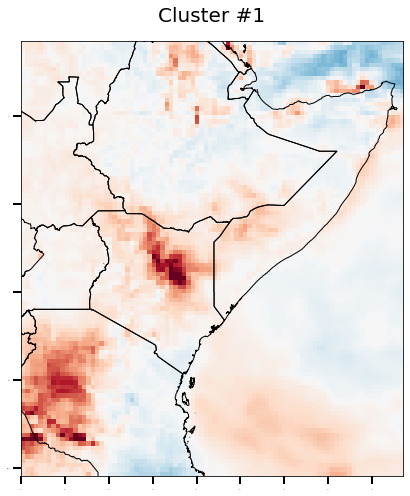

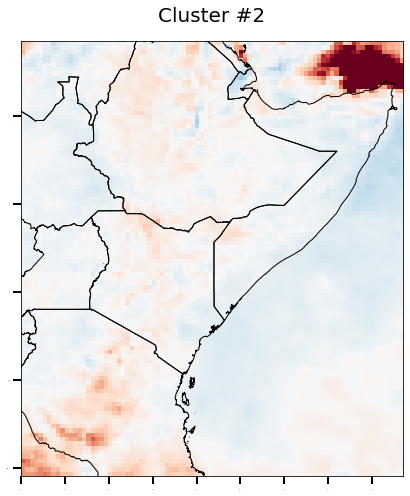

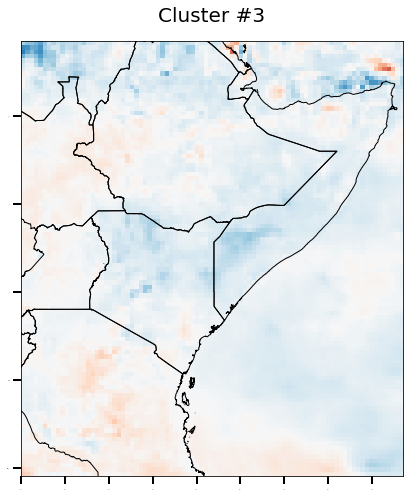

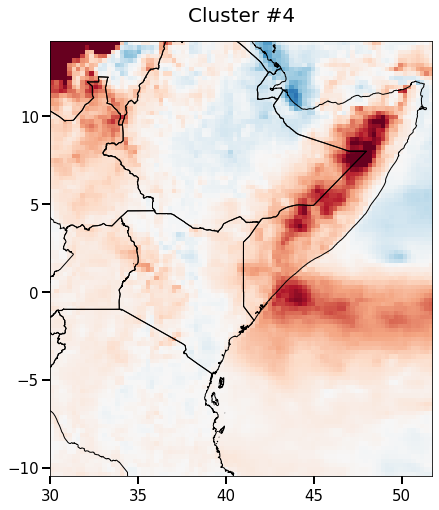

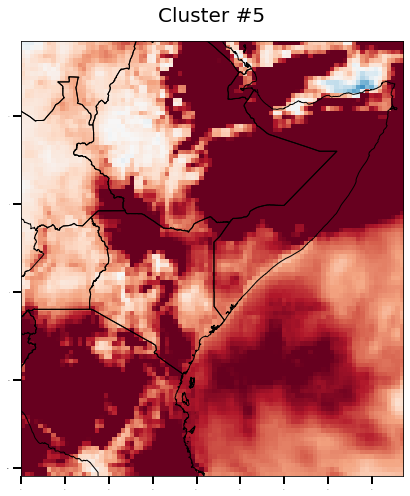

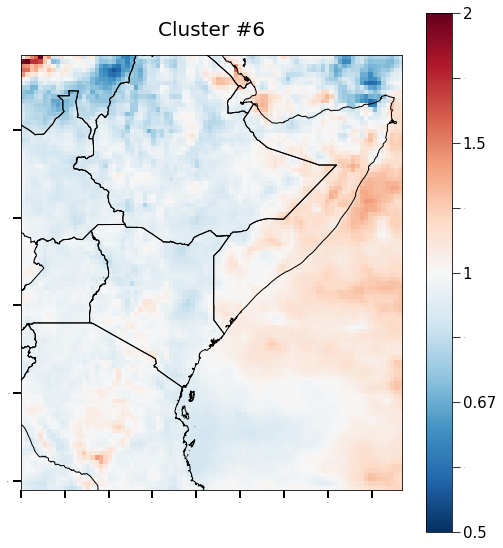

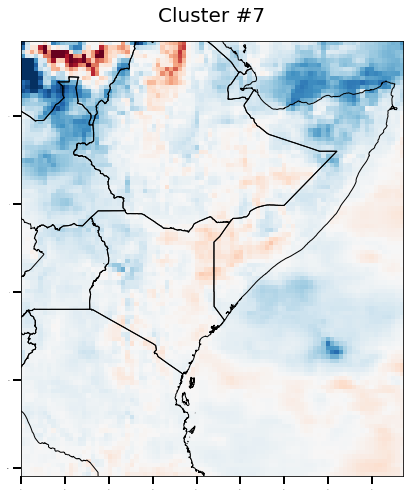

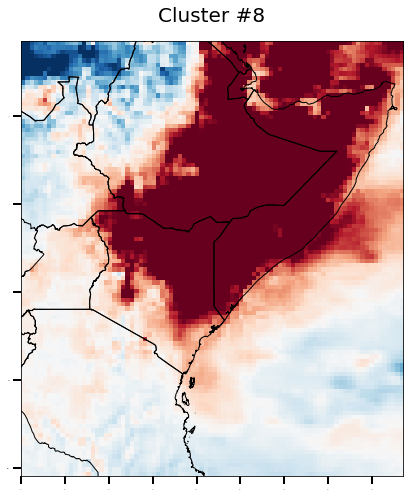

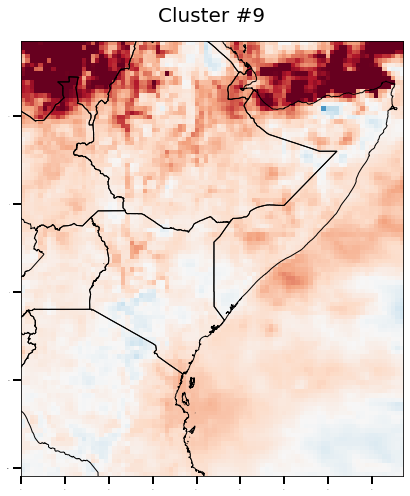

In [77]:
#SST Daily Wetness Index visualisieren (Dafür oben die Formel nochmal berechnen, diesmal mit SST)
fig,ax1 = plt.subplots(2,2,figsize=(0.0000001,0.0000001))
li=[]
gdf=Tra[0]
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
#ax1 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
#xa[0,0].plot(pos2)

gdf=Tra[0]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[1]
ax3 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax3.tick_params(labelsize=0,size=8,width=2)
pos3=ax3.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[2]
ax4 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax4.tick_params(labelsize=0,size=8,width=2)
pos4=ax4.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[3]
ax5 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax5.tick_params(labelsize=15,size=8,width=2)
pos5=ax5.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[4]
ax6 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax6.tick_params(labelsize=0,size=8,width=2)
pos6=ax6.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[5]
ax7 = sf.plot(edgecolor='black', facecolor='none',figsize=(8.55,9.55))
ax7.tick_params(labelsize=0,size=8,width=2)
pos7=ax7.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[6]
ax8 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax8.tick_params(labelsize=0,size=8,width=2)
pos8=ax8.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[7]
ax9 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax9.tick_params(labelsize=0,size=8,width=2)
pos9=ax9.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[8]
ax10 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
ax10.tick_params(labelsize=0,size=8,width=2)
pos10=ax10.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)

mpl.axes._axes.Axes.invert_yaxis(ax2)
mpl.axes._axes.Axes.invert_yaxis(ax3)
mpl.axes._axes.Axes.invert_yaxis(ax4)
mpl.axes._axes.Axes.invert_yaxis(ax5)
mpl.axes._axes.Axes.invert_yaxis(ax6)
mpl.axes._axes.Axes.invert_yaxis(ax7)
mpl.axes._axes.Axes.invert_yaxis(ax8)
mpl.axes._axes.Axes.invert_yaxis(ax9)
mpl.axes._axes.Axes.invert_yaxis(ax10)
ax2.set_title('Cluster #1',size=20,pad=20)
ax3.set_title('Cluster #2',size=20,pad=20)
ax4.set_title('Cluster #3',size=20,pad=20)
ax5.set_title('Cluster #4',size=20,pad=20)
ax6.set_title('Cluster #5',size=20,pad=20)
ax7.set_title('Cluster #6',size=20,pad=20)
ax8.set_title('Cluster #7',size=20,pad=20)
ax9.set_title('Cluster #8',size=20,pad=20)
ax10.set_title('Cluster #9',size=20,pad=20)
'''cbar2=fig.colorbar(pos2, ax=ax2)
cbar3=fig.colorbar(pos3, ax=ax3)
cbar4=fig.colorbar(pos4, ax=ax4)
cbar5=fig.colorbar(pos5, ax=ax5)
cbar6=fig.colorbar(pos6, ax=ax6)'''
cbar7=fig.colorbar(pos7, ax=ax7)
cbar7.ax.tick_params(labelsize=0,size=8)
cbar7.ax.text(2.8, 1.978,2,size=15)
cbar7.ax.text(2.8, 1.478,1.5,size=15)
cbar7.ax.text(2.8, 0.979,1,size=15)
cbar7.ax.text(2.8, 0.479,0.67,size=15)
cbar7.ax.text(2.8, -0.022,0.5,size=15)
#cbar7.ax.text(6, 3, 3)
#cbar7.ax.text(6, 4, 4)
#cbar7.ax.text(6, -1, 0.33)
#cbar7.ax.text(6, -2, 0.25)
'''
cbar8=fig.colorbar(pos8, ax=ax8)
cbar9=fig.colorbar(pos9, ax=ax9)
cbar10=fig.colorbar(pos10, ax=ax10)
cbar2.ax.tick_params(labelsize=20) 
cbar3.ax.tick_params(labelsize=20) 
cbar4.ax.tick_params(labelsize=20) 
cbar5.ax.tick_params(labelsize=20) 
cbar6.ax.tick_params(labelsize=20)'''
#cbar7.ax.tick_params(labelsize=20) 
'''cbar8.ax.tick_params(labelsize=20) 
cbar9.ax.tick_params(labelsize=20)
cbar10.ax.tick_params(labelsize=20) '''

In [76]:
mwr=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')

In [122]:
mwr.wr

<xarray.DataArray 'wr' (lat: 100, lon: 88)>
array([[ 93.50631 , 103.990501, 100.645798, ..., 158.16539 , 158.220871,
        158.294342],
       [ 93.996048, 101.020111,  98.754913, ..., 155.63623 , 156.144958,
        156.144058],
       [ 91.343231,  97.993233,  98.602478, ..., 153.214401, 153.73587 ,
        154.673843],
       ...,
       [134.621216, 132.44812 , 129.667877, ..., 148.363754, 149.017273,
        149.606537],
       [131.314484, 130.343277, 125.042931, ..., 148.104477, 148.362564,
        148.454254],
       [131.486938, 125.695831, 122.758011, ..., 147.389786, 147.842773,
        147.932373]])
Coordinates:
  * lat      (lat) float64 14.25 14.0 13.75 13.5 ... -9.75 -10.0 -10.25 -10.5
  * lon      (lon) float64 30.0 30.25 30.5 30.75 31.0 ... 51.0 51.25 51.5 51.75
Attributes:
    long_name:  Mean wind direction at 900 hPa niveau
    unit:       Degrees

In [1081]:
#u und v berechnen aus der Windrichtung, dies wird für die Darstellung benötigt
clu=xr.open_dataset('/Users/weber-j/Documents/Cluster-Ergebnisse/em_cnt_v122.nc')
uwind=[]
vwind=[]
for j in range (0,9):
    uwin=[]
    vwin=[]
    for lat in range (0,100):
        uwi=[]
        vwi=[]
        if float(lat/3)-int(lat/3)==0:
            for lon in range (0,88):
                if float(lon/3)-int(lon/3)==0:
                    u=-1*np.sin(np.pi/180*clu.cent[0,j,lat,lon])
                    v=-1*np.cos(np.pi/180*clu.cent[0,j,lat,lon])
                    uwi.append(float(u))
                    vwi.append(float(v))
            uwin.append(uwi)
            vwin.append(vwi)
    uwind.append(uwin)
    vwind.append(vwin)
clulat=[]
for i in range (0,100):
    if float(i/3)-int(i/3)==0:
        clulat.append(float(clu.lat[i]))

clulon=[]
for i in range (0,88):
    if float(i/3)-int(i/3)==0:
        clulon.append(float(clu.lon[i]))

In [323]:
#Erstellen einer File der Durchschnittlichen Windrichtung pro Cluster (SST und wr)
wrall=xr.open_dataset('/Users/weber-j/Documents/wr900_all.nc')
if len(wrall.time) > 14750 and len(wrall.time) < 15000:
    wrall=wrall.isel(longitude=slice(0,88),time=slice(688,15000))
else:
    wrall=wrall.isel(longitude=slice(0,88),time=slice(365,15000))

cnt=0
for i in range (0,len(dat.SST_Cluster)):    #Hier
    if dat.SST_Cluster[i]==1:               #und hier SST und wr900 tauschen bei Bedarf
        cnt=cnt+1
        t=int(int(i/92)*365+0.25*int(i/92))+i-int(i/92)*92+60
        if cnt == 1:
            wrs=wrall.u[t,0]
        else:
            wrs=wrs+wrall.u[t,0]
wrs=wrs/cnt

'cbar=fig.colorbar(pos2, ax=ax2)\ncbar.ax.tick_params(labelsize=0,size=8)\ncbar.ax.text(2.8, 1.978,2,size=15)\ncbar.ax.text(2.8, 1.478,1.5,size=15)\ncbar.ax.text(2.8, 0.979,1,size=15)\ncbar.ax.text(2.8, 0.479,0.67,size=15)\ncbar.ax.text(2.8, -0.022,0.5,size=15)'

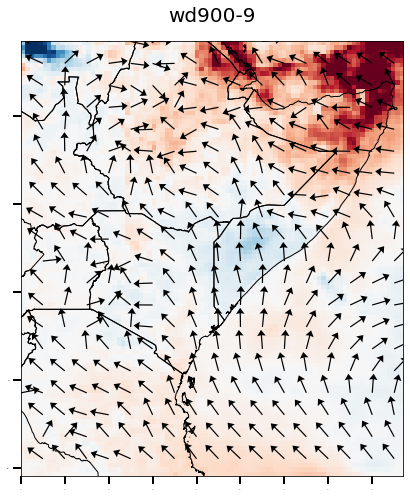

In [117]:
#Darstellung einzelner Cluster mit Windrichtung und passendem DWI, benutzt für Fig. 13 und 14

#Berechnungen wie oben, nur lediglich für ein Cluster
Clus=1
#Clus=Clus+1
wrall=xr.open_dataset('/Users/weber-j/Documents/wr900_all.nc')
if len(wrall.time) > 14750 and len(wrall.time) < 15000:
    wrall=wrall.isel(longitude=slice(0,88),time=slice(688,15000))
else:
    wrall=wrall.isel(longitude=slice(0,88),time=slice(365,15000))

cnt=0
for i in range (0,len(dat.wr900_Cluster)):
    if dat.wr900_Cluster[i]==Clus:
        cnt=cnt+1
        t=int(int(i/92)*365+0.25*int(i/92))+i-int(i/92)*92+60
        if cnt == 1:
            wrs=wrall.u[t,0]
        else:
            wrs=wrs+wrall.u[t,0]
wrs=wrs/cnt

clu=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
uwind=[]
vwind=[]
for j in range (0,1):
    uwin=[]
    vwin=[]
    for lat in range (0,100):
        uwi=[]
        vwi=[]
        if float(lat/5)-int(lat/5)==0:
            for lon in range (0,88):
                if float(lon/5)-int(lon/5)==0:
                    u=-1*np.sin(np.pi/180*wrs[lat,lon])
                    v=-1*np.cos(np.pi/180*wrs[lat,lon])
                    uwi.append(float(u))
                    vwi.append(float(v))
            uwin.append(uwi)
            vwin.append(vwi)
    uwind.append(uwin)
    vwind.append(vwin)
clulat=[]
for i in range (0,100):
    if float(i/5)-int(i/5)==0:
        clulat.append(float(clu.lat[i]))

clulon=[]
for i in range (0,88):
    if float(i/5)-int(i/5)==0:
        clulon.append(float(clu.lon[i]))
        
fig,ax1 = plt.subplots(2,2,figsize=(0.0000001,0.0000001))
gdd=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
li=[]
gdf=gdd.wr
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
title='wd900-'+str(Clus)

gdf=Tra[Clus-1]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[0],vwind[0], color='k',scale=20,headwidth=7)    #Zeichnet Pfeile ein
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=-1,vmax=3,cmap='RdBu_r',extent=extent_mat)
mpl.axes._axes.Axes.invert_yaxis(ax2)
ax2.set_title(title,size=20,pad=20)
'''cbar=fig.colorbar(pos2, ax=ax2)
cbar.ax.tick_params(labelsize=0,size=8)
cbar.ax.text(2.8, 1.978,2,size=15)
cbar.ax.text(2.8, 1.478,1.5,size=15)
cbar.ax.text(2.8, 0.979,1,size=15)
cbar.ax.text(2.8, 0.479,0.67,size=15)
cbar.ax.text(2.8, -0.022,0.5,size=15)'''

In [78]:
#File der Tägliche Windrichtung berechnen
wrall=xr.open_dataset('/Users/weber-j/Documents/wr900_all.nc')
wrdy=[]
for Tag in range (0,92):
    for Jahr in range (0,39):
        t=Jahr*365+59+int((Jahr)/4)+Tag
        if Jahr == 0:
            data=wrall.u[t,0]
        else:
            data=data+wrall.u[t,0]
    date=data/39
    wrdy.append(np.asarray(date))

In [344]:
wrall.u[0,0]

<xarray.DataArray 'u' (latitude: 100, longitude: 89)>
array([[358.39316, 355.1822 , 353.37427, ...,  66.05628,  65.00362,  64.15137],
       [358.39316, 355.1822 , 353.37427, ...,  66.05628,  65.00362,  64.15137],
       [358.39316, 355.1822 , 353.37427, ...,  66.05628,  65.00362,  64.15137],
       ...,
       [358.39316, 355.1822 , 353.37427, ...,  66.05628,  65.00362,  64.15137],
       [358.39316, 355.1822 , 353.37427, ...,  66.05628,  65.00362,  64.15137],
       [358.39316, 355.1822 , 353.37427, ...,  66.05628,  65.00362,  64.15137]],
      dtype=float32)
Coordinates:
    time       datetime64[ns] 1979-01-01T12:00:00
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 51.5 51.75 52.0
  * latitude   (latitude) float32 14.25 14.0 13.75 13.5 ... -10.0 -10.25 -10.5
    level      float64 750.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

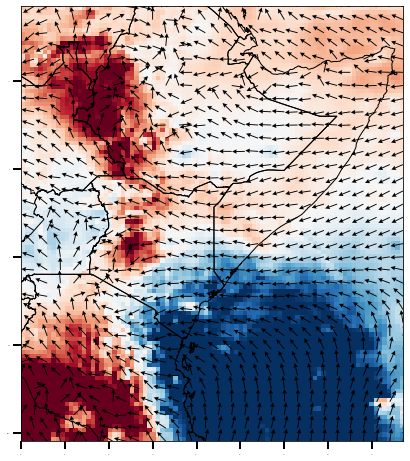

In [32]:
#Durchschnittliche Windrichtung über Zeitraum sta bis end, benutzt zum Vergleich der Cluster zu den zu der Auftrittszeit der 
#Cluster üblichen Windmuster. Der DWI der dahinter geplottet ist hat nichts zu bedeuten

sta=0
end=20
wrs=wrdy[sta]
for i in range (sta+1,end):
    wrs=wrdy[i]+wrs
wrs=wrs/(end-sta)

clu=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
uwind=[]
vwind=[]
for j in range (0,1):
    uwin=[]
    vwin=[]
    for lat in range (0,100):
        uwi=[]
        vwi=[]
        if float(lat/3)-int(lat/3)==0:
            for lon in range (0,88):
                if float(lon/3)-int(lon/3)==0:
                    u=-1*np.sin(np.pi/180*wrs[lat,lon])
                    v=-1*np.cos(np.pi/180*wrs[lat,lon])
                    uwi.append(float(u))
                    vwi.append(float(v))
            uwin.append(uwi)
            vwin.append(vwi)
    uwind.append(uwin)
    vwind.append(vwin)
clulat=[]
for i in range (0,100):
    if float(i/3)-int(i/3)==0:
        clulat.append(float(clu.lat[i]))

clulon=[]
for i in range (0,88):
    if float(i/3)-int(i/3)==0:
        clulon.append(float(clu.lon[i]))
        
fig,ax1 = plt.subplots(2,2,figsize=(0.0000001,0.0000001))
gdd=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
li=[]
gdf=gdd.wr
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
#ax1 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
#xa[0,0].plot(pos2)

gdf=Wetness[0]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[0],vwind[0], color='k',scale=30,headwidth=5)    #Zeichnet Pfeile ein
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
mpl.axes._axes.Axes.invert_yaxis(ax2)

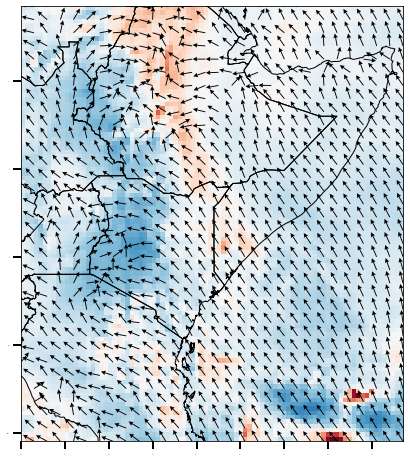

In [129]:
#Mean wr900 visualisieren
clu=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
uwind=[]
vwind=[]
for j in range (0,1):
    uwin=[]
    vwin=[]
    for lat in range (0,100):
        uwi=[]
        vwi=[]
        if float(lat/3)-int(lat/3)==0:
            for lon in range (0,88):
                if float(lon/3)-int(lon/3)==0:
                    u=-1*np.sin(np.pi/180*clu.wr[lat,lon])
                    v=-1*np.cos(np.pi/180*clu.wr[lat,lon])
                    uwi.append(float(u))
                    vwi.append(float(v))
            uwin.append(uwi)
            vwin.append(vwi)
    uwind.append(uwin)
    vwind.append(vwin)
clulat=[]
for i in range (0,100):
    if float(i/3)-int(i/3)==0:
        clulat.append(float(clu.lat[i]))

clulon=[]
for i in range (0,88):
    if float(i/3)-int(i/3)==0:
        clulon.append(float(clu.lon[i]))
        
fig,ax1 = plt.subplots(2,2,figsize=(0.0000001,0.0000001))
gdd=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
li=[]
gdf=gdd.wr
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
#ax1 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
#xa[0,0].plot(pos2)

gdf=Wetness[0]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[0],vwind[0], color='k',scale=30,headwidth=5)    #Zeichnet Pfeile ein
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
matplotlib.axes._axes.Axes.invert_yaxis(ax2)

In [1080]:
uwind[0][1]

[-0.8818240772314176,
 -0.9741018863674689,
 -0.8683574827661595,
 0.5630479314850849,
 0.6508968266068152,
 0.9635010960077891,
 0.9979055558009197,
 0.9992409924794149,
 0.9531936955217356,
 0.9318266756581786,
 0.19528595612446406,
 0.981660097280362,
 0.16222434924625917,
 -0.9703797779900499,
 -0.6631205421623867,
 0.11901724121734795,
 -0.469108932445852,
 -0.173930110978386,
 0.3027060709149639,
 -0.564188121670861,
 -0.5065217064412981,
 -0.6561685623485264,
 -0.8361721697035758,
 -0.8042724136118418,
 -0.7698422112941545,
 -0.8095320021485088,
 -0.8059718422557973,
 -0.8002308547302612,
 -0.8065686770330613,
 -0.761144870116987]

In [1120]:
#Windrichtung berechnen 900 hPa
fig,ax1 = plt.subplots(2,2,figsize=(0.0000001,0.0000001))
gdd=xr.open_dataset('/Users/weber-j/Documents/Mean_wr900.nc')
clu=xr.open_dataset('/Users/weber-j/Documents/Cluster-Ergebnisse/em_cnt_v122.nc')
li=[]
gdf=gdd.wr
top_left_lon=30.0
top_left_lat=-10.5
sf = gpd.read_file('/Users/weber-j/Downloads/gha_region_icpac_2016/GHA.shp')
extent_mat = (top_left_lon, top_left_lon + (len(gdf[0])-1) * 0.25, top_left_lat - (len(gdf)-1) * -0.25, top_left_lat)
#ax1 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,9))
#xa[0,0].plot(pos2)
#u und v berechnen aus der Richtung
uwind=[]
vwind=[]
for j in range (0,9):
    uwin=[]
    vwin=[]
    for lat in range (0,100):
        uwi=[]
        vwi=[]
        if float(lat/5)-int(lat/5)==0:
            for lon in range (0,88):
                if float(lon/5)-int(lon/5)==0:
                    u=-1*np.sin(np.pi/180*clu.cent[0,j,lat,lon])
                    v=-1*np.cos(np.pi/180*clu.cent[0,j,lat,lon])
                    uwi.append(float(u))
                    vwi.append(float(v))
            uwin.append(uwi)
            vwin.append(vwi)
    uwind.append(uwin)
    vwind.append(vwin)
clulat=[]
for i in range (0,100):
    if float(i/5)-int(i/5)==0:
        clulat.append(float(clu.lat[i]))

clulon=[]
for i in range (0,88):
    if float(i/5)-int(i/5)==0:
        clulon.append(float(clu.lon[i]))

'cbar8.ax.tick_params(labelsize=20) \ncbar9.ax.tick_params(labelsize=20)\ncbar10.ax.tick_params(labelsize=20) '

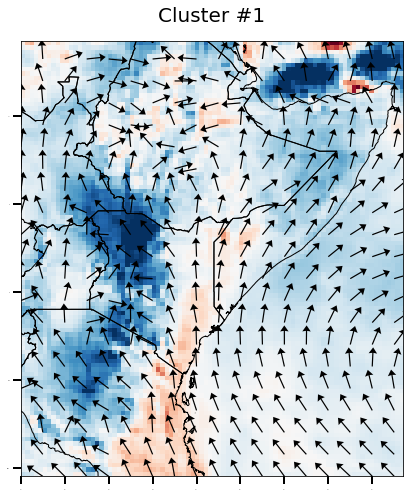

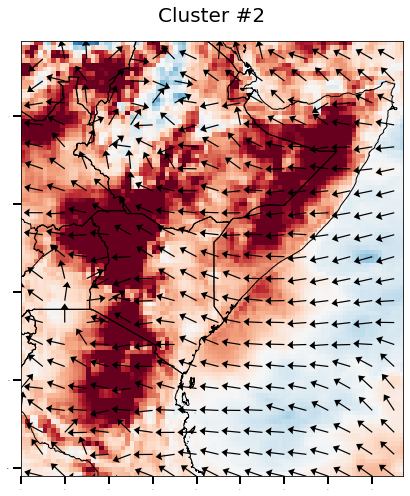

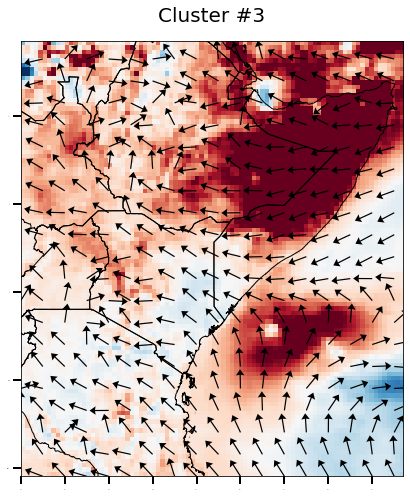

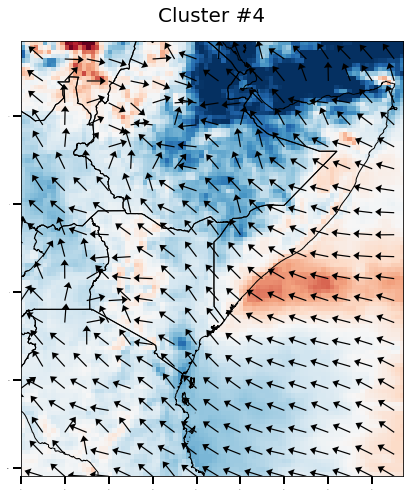

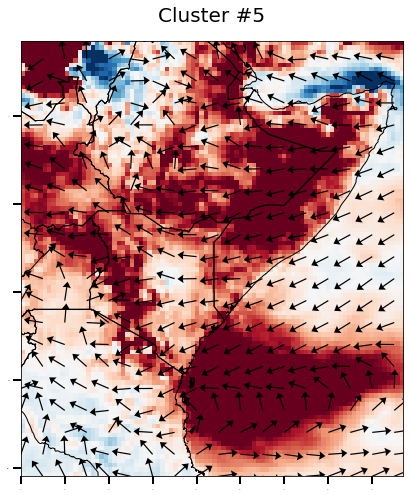

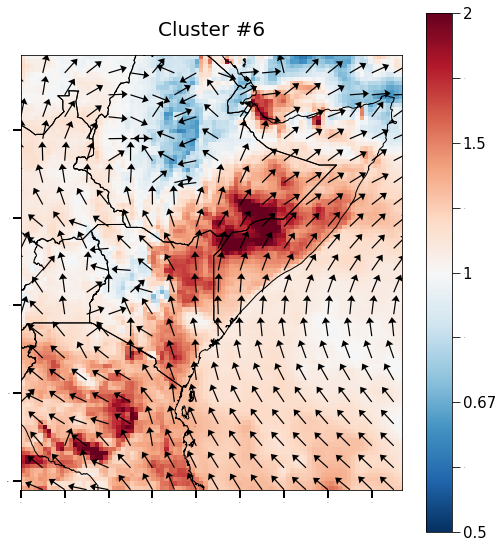

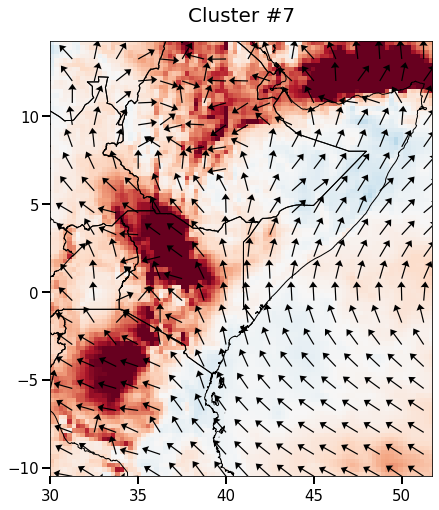

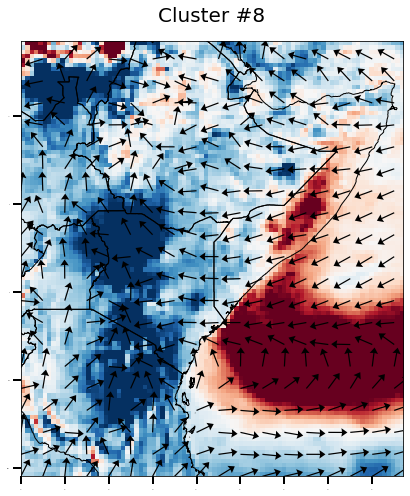

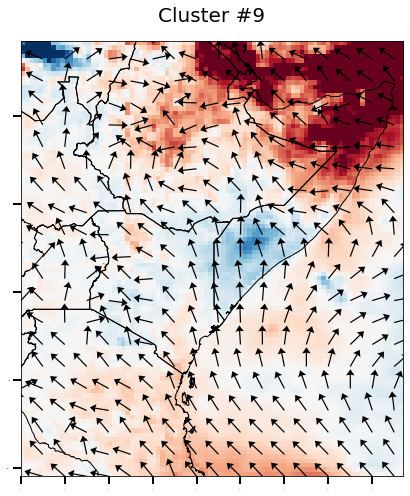

In [1125]:
#Windrichtung visualisieren 900 hPa
gdf=Tra[0]
ax2 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[0],vwind[0], color='k',scale=20,headwidth=7)    #Zeichnet Pfeile ein
ax2.tick_params(labelsize=0,size=8,width=2)
pos2=ax2.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[1]
ax3 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[1],vwind[1], color='k',scale=20,headwidth=7)
ax3.tick_params(labelsize=0,size=8,width=2)
pos3=ax3.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[2]
ax4 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[2],vwind[2], color='k',scale=20,headwidth=7)
ax4.tick_params(labelsize=0,size=8,width=2)
pos4=ax4.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[3]
ax5 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[3],vwind[3], color='k',scale=20,headwidth=7)
ax5.tick_params(labelsize=0,size=8,width=2)
pos5=ax5.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[4]
ax6 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[4],vwind[4], color='k',scale=20,headwidth=7)
ax6.tick_params(labelsize=0,size=8,width=2)
pos6=ax6.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[5]
ax7 = sf.plot(edgecolor='black', facecolor='none',figsize=(8.55,9.55))
qv = plt.quiver(clulon, clulat,uwind[5],vwind[5], color='k',scale=20,headwidth=7)
ax7.tick_params(labelsize=0,size=8,width=2)
pos7=ax7.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[6]
ax8 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[6],vwind[6], color='k',scale=20,headwidth=7)
ax8.tick_params(labelsize=15,size=8,width=2)
pos8=ax8.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[7]
ax9 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[7],vwind[7], color='k',scale=20,headwidth=7)
ax9.tick_params(labelsize=0,size=8,width=2)
pos9=ax9.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)
gdf=Tra[8]
ax10 = sf.plot(edgecolor='black', facecolor='none',figsize=(8,8))
qv = plt.quiver(clulon, clulat,uwind[8],vwind[8], color='k',scale=20,headwidth=7)
ax10.tick_params(labelsize=0,size=8,width=2)
pos10=ax10.imshow(gdf,vmin=0,vmax=2,cmap='RdBu_r',extent=extent_mat)

matplotlib.axes._axes.Axes.invert_yaxis(ax2)
matplotlib.axes._axes.Axes.invert_yaxis(ax3)
matplotlib.axes._axes.Axes.invert_yaxis(ax4)
matplotlib.axes._axes.Axes.invert_yaxis(ax5)
matplotlib.axes._axes.Axes.invert_yaxis(ax6)
matplotlib.axes._axes.Axes.invert_yaxis(ax7)
matplotlib.axes._axes.Axes.invert_yaxis(ax8)
matplotlib.axes._axes.Axes.invert_yaxis(ax9)
matplotlib.axes._axes.Axes.invert_yaxis(ax10)
ax2.set_title('Cluster #1',size=20,pad=20)
ax3.set_title('Cluster #2',size=20,pad=20)
ax4.set_title('Cluster #3',size=20,pad=20)
ax5.set_title('Cluster #4',size=20,pad=20)
ax6.set_title('Cluster #5',size=20,pad=20)
ax7.set_title('Cluster #6',size=20,pad=20)
ax8.set_title('Cluster #7',size=20,pad=20)
ax9.set_title('Cluster #8',size=20,pad=20)
ax10.set_title('Cluster #9',size=20,pad=20)
'''cbar2=fig.colorbar(pos2, ax=ax2)
cbar3=fig.colorbar(pos3, ax=ax3)
cbar4=fig.colorbar(pos4, ax=ax4)
cbar5=fig.colorbar(pos5, ax=ax5)
cbar6=fig.colorbar(pos6, ax=ax6)'''
cbar7=fig.colorbar(pos7, ax=ax7)
cbar7.ax.tick_params(labelsize=0,size=8)
cbar7.ax.text(2.8, 1.978,2,size=15)
cbar7.ax.text(2.8, 1.478,1.5,size=15)
cbar7.ax.text(2.8, 0.979,1,size=15)
cbar7.ax.text(2.8, 0.479,0.67,size=15)
cbar7.ax.text(2.8, -0.022,0.5,size=15)
#cbar7.ax.text(6, 3, 3)
#cbar7.ax.text(6, 4, 4)
#cbar7.ax.text(6, -1, 0.33)
#cbar7.ax.text(6, -2, 0.25)
'''
cbar8=fig.colorbar(pos8, ax=ax8)
cbar9=fig.colorbar(pos9, ax=ax9)
cbar10=fig.colorbar(pos10, ax=ax10)
cbar2.ax.tick_params(labelsize=20) 
cbar3.ax.tick_params(labelsize=20) 
cbar4.ax.tick_params(labelsize=20) 
cbar5.ax.tick_params(labelsize=20) 
cbar6.ax.tick_params(labelsize=20)'''
#cbar7.ax.tick_params(labelsize=20) 
'''cbar8.ax.tick_params(labelsize=20) 
cbar9.ax.tick_params(labelsize=20)
cbar10.ax.tick_params(labelsize=20) '''

In [ ]:
#Windrichtung pro Land nach Cluster berechnen
from Formeln import durschn
Länder=['Burundi','Dschibuti','Eritrea','Ethiopia','Kenia','Ruanda','Somalia','Tansania','SouthSudan','Sudan','Uganda',
        'Indischer_Ozean','Alles']
ged=xr.open_dataset('/Users/weber-j/Documents/Masken/GHA_klein.nc')
for Land in range (0,12):
    print('Land:',Länder[Land])
    for cl in range (0,9):
        wr_l=durschn(clu.cent[0][cl]*np.asarray(ged.Masken[Land]),ged.Masken[Land])
        print(float(np.sum(wr_l)))

AttributeError: 'DataFrame' object has no attribute 'v350'

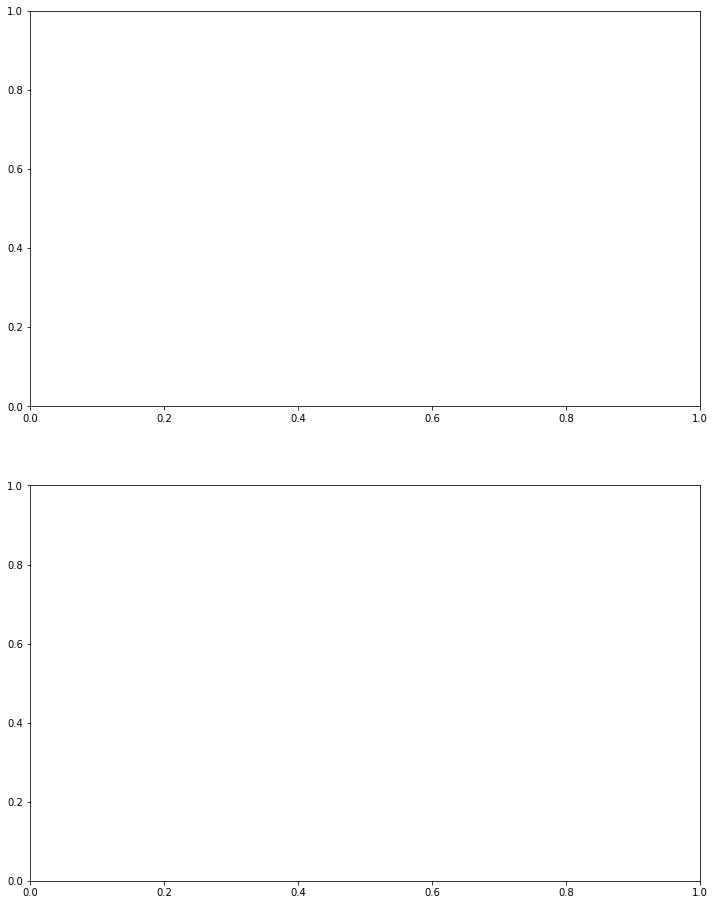

In [90]:
#Darstellung der ARI-Plots (Fig. 8)
fig, ax = plt.subplots(2,1,figsize=(12,16))
gd=pd.read_csv('/Users/weber-j/Documents/ARI.csv', sep=";", index_col=[0])

ax[0].plot(gd.v350,color='#31a354',linestyle='--',linewidth=2,marker='o',markersize=5,markerfacecolor='#31a354')
ax[0].plot(gd.v500,color='#a1dab4',linestyle='--',linewidth=2,marker='o',markersize=5,markerfacecolor='#a1dab4')
ax[0].plot(gd.v750,color='#41b6c4',linestyle='--',linewidth=2,marker='o',markersize=5,markerfacecolor='#41b6c4')
ax[0].plot(gd.v900,color='#2c7fb8',linestyle='--',linewidth=2,marker='o',markersize=5,markerfacecolor='#2c7fb8')
ax[0].plot(gd.v10,color='#253494',linestyle='--',linewidth=2,marker='o',markersize=5,markerfacecolor='#253494')
ax[0].plot(gd.u350,color='#31a354',linewidth=2,marker='o',markersize=5,markerfacecolor='#31a354')
ax[0].plot(gd.u500,color='#a1dab4',linewidth=2,marker='o',markersize=5,markerfacecolor='#a1dab4')
ax[0].plot(gd.u750,color='#41b6c4',linewidth=2,marker='o',markersize=5,markerfacecolor='#41b6c4')
ax[0].plot(gd.u900,color='#2c7fb8',linewidth=2,marker='o',markersize=5,markerfacecolor='#2c7fb8')
ax[0].plot(gd.u10,color='#253494',linewidth=2,marker='o',markersize=5,markerfacecolor='#253494')
ax[0].grid(linestyle='--',linewidth=1)
ax[0].axis(ymax=0.15,ymin=0.0)
ax[0].tick_params(labelsize=16)

ax[1].plot(gd.v10,color='#253494',linestyle='--',linewidth=2,marker='o',markersize=5,markerfacecolor='#253494')
ax[1].plot(gd.SST,color='#969696',linewidth=2,marker='o',markersize=5,markerfacecolor='#969696')
ax[1].plot(gd.ws10,color='#bd0026',linewidth=2,marker='o',markersize=5,markerfacecolor='#bd0026')
ax[1].plot(gd.sp,color='#fe9929',linewidth=2,marker='o',markersize=5,markerfacecolor='#fe9929')
ax[1].plot(gd.wr10,color='#fed976',linewidth=2,marker='o',markersize=5,markerfacecolor='#fed976')
ax[1].plot(gd.wr750,color='#fc4e2a',linewidth=2,marker='o',markersize=5,markerfacecolor='#fc4e2a')
ax[1].plot(gd.wr900,color='#800026',linewidth=2,marker='o',markersize=5,markerfacecolor='#800026')
ax[1].grid(linestyle='--',linewidth=1)
ax[1].axis(ymax=0.15,ymin=0.0)
ax[1].tick_params(labelsize=16)

new0 = mlines.Line2D([], [], color='#31a354',linestyle='--', label='v350',marker='o',markersize=5,markerfacecolor='#31a354')
new1 = mlines.Line2D([], [], color='#a1dab4',linestyle='--', label='v500',marker='o',markersize=5,markerfacecolor='#a1dab4')
new2 = mlines.Line2D([], [], color='#41b6c4',linestyle='--', label='v750',marker='o',markersize=5,markerfacecolor='#41b6c4')
new3 = mlines.Line2D([], [], color='#2c7fb8',linestyle='--', label='v900',marker='o',markersize=5,markerfacecolor='#2c7fb8')
new4 = mlines.Line2D([], [], color='#253494',linestyle='--', label='v10',marker='o',markersize=5,markerfacecolor='#253494')
new5 = mlines.Line2D([], [], color='#31a354', label='u350',marker='o',markersize=5,markerfacecolor='#31a354')
new6 = mlines.Line2D([], [], color='#a1dab4', label='u500',marker='o',markersize=5,markerfacecolor='#a1dab4')
new7 = mlines.Line2D([], [], color='#41b6c4', label='u750',marker='o',markersize=5,markerfacecolor='#41b6c4')
new8 = mlines.Line2D([], [], color='#2c7fb8', label='u900',marker='o',markersize=5,markerfacecolor='#2c7fb8')
new9 = mlines.Line2D([], [], color='#253494', label='u10',marker='o',markersize=5,markerfacecolor='#253494')
new10 = mlines.Line2D([], [], color='#bd0026', label='ws10',marker='o',markersize=5,markerfacecolor='#bd0026')
new11 = mlines.Line2D([], [], color='#969696', label='SST',marker='o',markersize=5,markerfacecolor='#969696')
new12 = mlines.Line2D([], [], color='#fe9929', label='sp',marker='o',markersize=5,markerfacecolor='#fe9929')
new13 = mlines.Line2D([], [], color='#fed976', label='wd10',marker='o',markersize=5,markerfacecolor='#fed976')
new14 = mlines.Line2D([], [], color='#fc4e2a', label='wd750',marker='o',markersize=5,markerfacecolor='#fc4e2a')
new15 = mlines.Line2D([], [], color='#800026', label='wd900',marker='o',markersize=5,markerfacecolor='#800026')


ax[0].legend(handles=[new0,new1,new2,new3,new4,new5,new6,new7,new8,new9],prop={'size': 16},loc='upper right',ncol=2)
ax[1].legend(handles=[new4,new11,new15,new10,new14,new12,new13],prop={'size': 16},loc='upper right',ncol=2)


ax[0].set_ylabel('Adjusted Rand Index',fontsize=16)
ax[1].set_ylabel('Adjusted Rand Index',fontsize=16)
ax[0].set_xlabel('Shifted Days',fontsize=16)
ax[1].set_xlabel('Shifted Days',fontsize=16)

In [ ]:
gd

In [246]:
#Anordnungskoordinaten der Punkte in Hufeisenform (Form gewählt aufgrund der besseren Erkennbarkeit als bei einem Netz)
pos2={
    5: ([ 1   , 0.65]),
    1: ([ 0.95, 0.3 ]),    #SST: 5,1,2,3,6,9,4,7,8
    2: ([ 0.85, 0.05]),
    3: ([ 0.65,-0.15]),
    6: ([ 0.4 ,-0.25]),
    9: ([ 0.15,-0.15]),
    4: ([-0.05, 0.05]),
    7: ([-0.15, 0.3 ]),
    8: ([-0.2 , 0.65]),
    }
pos3={
    6: ([ 1   , 0.65]),
    7: ([ 0.95, 0.3 ]),
    1: ([ 0.85, 0.05]),    #wr900: 6,7,1,9,4,3,2,8,5
    9: ([ 0.65,-0.15]),
    4: ([ 0.4 ,-0.25]),
    3: ([ 0.15,-0.15]),
    2: ([-0.05, 0.05]),
    8: ([-0.15, 0.3 ]),
    5: ([-0.2 , 0.65]),
    }
pos4={
    2: ([ 1   , 0.65]),
    10: ([ 0.95, 0.3 ]),
    5: ([ 0.85, 0.05]),
    4: ([ 0.75,-0.1 ]),    #tp: 2,10,5,4,7,1,3,6,11,8,9
    7: ([ 0.6 ,-0.2 ]),
    1: ([ 0.4 ,-0.275]),
    3: ([ 0.2 ,-0.2 ]),
    6: ([ 0.05,-0.1 ]),
    11: ([-0.05, 0.05]),
    8: ([-0.15, 0.3 ]),
    9: ([-0.2 , 0.65]),
    }

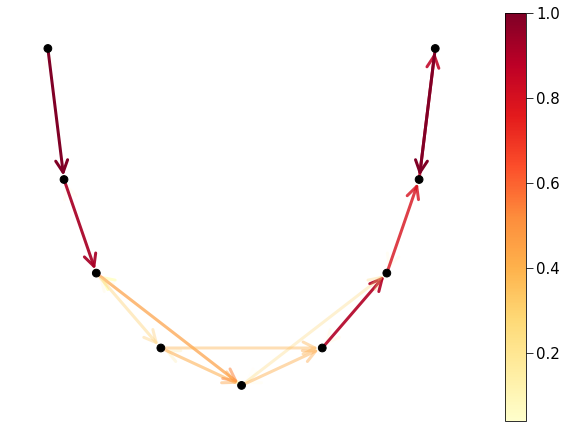

In [251]:
#Multiple Directed Graph für die SST (Fig. 16)
fig=plt.figure(figsize=(10.5,7.5))
MG = nx.MultiDiGraph()
#Welcher Pfeil geht von wo nach wo mit welcher Stärke
MG.add_weighted_edges_from([(1,2,0.13),(1,5,0.87),(2,1,0.8),(2,3,0.15),(2,6,0.06),(3,2,0.9),(3,6,0.1),(4,6,0.54),(4,7,0.12),(4,9,0.34),
                            (5,1,1),(6,2,0.3),(6,3,0.43),(6,4,0.04),(6,9,0.23),(7,4,0.92),(7,8,0.08),(8,7,1),(9,3,0.41),(9,4,0.14),
                            (9,6,0.45)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

node_sizes = [60,60,60,60,60,60,60,60,60]
M = MG.number_of_edges()
ec = (0.13,0.87,0.8,0.15,0.06,1,0.9,0.1,0.3,0.43,0.04,0.23,0.54,0.12,0.34,0.92,0.08,0.41,0.14,0.45,1)
edge_alphas = (0.13,0.87,0.8,0.15,0.06,1,0.9,0.1,0.3,0.43,0.04,0.23,0.54,0.12,0.34,0.92,0.08,0.41,0.14,0.45,1)
cmap = plt.cm.YlOrRd

nodes = nx.draw_networkx_nodes(MG, pos2, node_size=node_sizes, node_color="k")
edges = nx.draw_networkx_edges(MG, pos2, node_size=node_sizes,alpha=None, arrowstyle="->", arrowsize=30, edge_color=ec, edge_cmap=cmap,
                               width=3,)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(ec)
cbar=fig.colorbar(pc)
cbar.ax.tick_params(labelsize=15,size=7)
ax = plt.gca()
ax.set_axis_off()
plt.show()

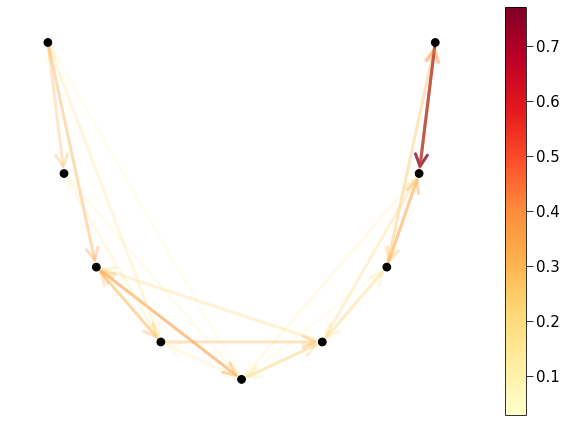

In [202]:
#Multiple Directed Graph für die wr900 (Fig 16)
fig=plt.figure(figsize=(7*1.5,5*1.5))
MG = nx.MultiDiGraph()
MG.add_weighted_edges_from([(1,4,0.09),(1,6,0.3),(1,7,0.38),(1,9,0.23),(2,3,0.33),(2,4,0.38),(2,5,0.14),(2,9,0.11),(3,1,0.03),
                            (3,2,0.28),(3,4,0.13),(3,5,0.13),(3,8,0.11),(3,9,0.32),(4,1,0.08),(4,2,0.33),(4,3,0.14),(4,7,0.12),
                            (4,9,0.27),(5,2,0.35),(5,3,0.19),(5,4,0.13),(5,8,0.31),(6,1,0.19),(6,7,0.77),(7,1,0.3),(7,4,0.12),
                            (7,6,0.41),(7,9,0.14),(8,3,0.14),(8,4,0.14),(9,1,0.24),(9,2,0.06),(9,3,0.21),(9,4,0.21),(9,7,0.23)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

node_sizes = [60,60,60,60,60,60,60,60,60]
M = MG.number_of_edges()
ec = (0.09,0.3,0.38,0.23,0.08,0.33,0.14,0.12,0.27,0.19,0.77,0.3,0.12,0.41,0.14,0.21,0.24,0.06,0.21,0.23,0.33,0.38,0.14,0.11,0.03,
      0.28,0.13,0.13,0.11,0.32,0.35,0.19,0.13,0.31,0.14,0.14)
edge_alphas = (0.09,0.3,0.38,0.23,0.08,0.33,0.14,0.12,0.27,0.19,0.77,0.3,0.12,0.41,0.14,0.21,0.24,0.06,0.21,0.23,0.33,0.38,0.14,
               0.11,0.03,0.28,0.13,0.13,0.11,0.32,0.35,0.19,0.13,0.31,0.14,0.14)
cmap = plt.cm.YlOrRd

nodes = nx.draw_networkx_nodes(MG, pos3, node_size=node_sizes, node_color="k")
edges = nx.draw_networkx_edges(MG, pos3, node_size=node_sizes, arrowstyle="->", alpha=0.9, arrowsize=30, edge_color=ec, edge_cmap=cmap,
                               width=3,)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(ec)
cbar=fig.colorbar(pc)
cbar.ax.tick_params(labelsize=15,size=7)
#plt.colorbar(pc)
ax = plt.gca()
ax.set_axis_off()
plt.show()

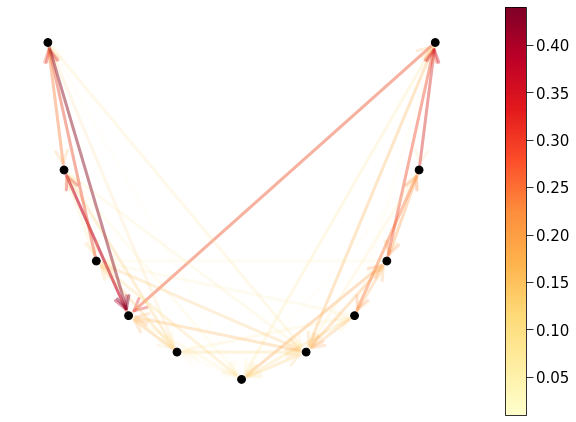

In [36]:
#Multiple Directed Graph für die tp (Fig. 16)
fig=plt.figure(figsize=(7*1.5,5*1.5))
MG = nx.MultiDiGraph()
MG.add_weighted_edges_from([(1,2,0.08),(1,3,0.08),(1,4,0.11),(1,5,0.23),(1,6,0.09),(1,7,0.16),(1,8,0.07),(1,11,0.12),(2,1,0.12),
                            (2,5,0.17),(2,6,0.33),(2,7,0.19),(2,10,0.13),(3,4,0.12),(3,5,0.01),(3,6,0.20),(3,7,0.15),(3,8,0.17),
                            (3,9,0.14),(3,11,0.17),(4,1,0.13),(4,2,0.06),(4,5,0.21),(4,7,0.21),(4,10,0.26),(4,11,0.11),(5,1,0.13),
                            (5,2,0.32),(5,4,0.08),(5,7,0.21),(5,10,0.14),(5,11,0.09),(6,1,0.07),(6,2,0.19),(6,3,0.13),(6,7,0.11),
                            (6,8,0.34),(6,9,0.13),(7,1,0.11),(7,2,0.15),(7,3,0.11),(7,4,0.06),(7,5,0.11),(7,6,0.20),(7,8,0.05),
                            (7,9,0.06),(7,10,0.08),(7,11,0.06),(8,1,0.07),(8,3,0.10),(8,6,0.39),(8,7,0.10),(8,9,0.27),(8,11,0.06),
                            (9,1,0.05),(9,6,0.44),(9,7,0.12),(9,8,0.19),(9,11,0.16),(10,1,0.05),(10,2,0.36),(10,4,0.23),(10,5,0.23),
                            (10,7,0.09),(11,1,0.13),(11,3,0.1),(11,7,0.18),(11,8,0.12),(11,9,0.34),])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

node_sizes = [60,60,60,60,60,60,60,60,60,60,60]
M = MG.number_of_edges()
ec = (0.08,0.08,0.11,0.23,0.09,0.16,0.07,0.12,0.12,0.17,0.33,0.19,0.13,0.12,0.01,0.2,0.15,0.17,0.14,0.17,0.13,0.06,0.21,0.21,0.26,
      0.11,0.13,0.32,0.08,0.21,0.14,0.09,0.07,0.19,0.13,0.11,0.34,0.13,0.11,0.15,0.11,0.06,0.11,0.2,0.05,0.06,0.08,0.06,0.07,0.1,
      0.39,0.1,0.27,0.06,0.13,0.1,0.18,0.12,0.34,0.05,0.36,0.23,0.23,0.09,0.05,0.44,0.12,0.19,0.16)
edge_alphas = (0.08,0.08,0.11,0.23,0.09,0.16,0.07,0.12,0.12,0.17,0.33,0.19,0.13,0.12,0.01,0.2,0.15,0.17,0.14,0.17,0.13,0.06,0.21,
               0.21,0.26,0.11,0.13,0.32,0.08,0.21,0.14,0.09,0.07,0.19,0.13,0.11,0.34,0.13,0.11,0.15,0.11,0.06,0.11,0.2,0.05,0.06,
               0.08,0.06,0.07,0.1,0.39,0.1,0.27,0.06,0.13,0.1,0.18,0.12,0.34,0.05,0.36,0.23,0.23,0.09,0.05,0.44,0.12,0.19,0.16)
cmap = plt.cm.YlOrRd

nodes = nx.draw_networkx_nodes(MG, pos4, node_size=node_sizes, node_color="k")
edges = nx.draw_networkx_edges(MG, pos4, node_size=node_sizes, arrowstyle="->", arrowsize=30, edge_color=ec, edge_cmap=cmap, width=3,)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(ec)
cbar=fig.colorbar(pc)
cbar.ax.tick_params(labelsize=15,size=7)
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [1160]:
#Mann-Kendall-Test durchführen
data=pd.read_csv('/Users/weber-j/Documents/M_K-Data.txt')
import pymannkendall as mk
mk.original_test(data[0])

Mann_Kendall_Test(trend='no trend', h=False, p=0.8343805677477654, z=-0.20908668637352482, Tau=-0.015321756894790603, s=-60.0, var_s=79625.33333333333, slope=-1.3948000942538454, intercept=8936.02745414717)

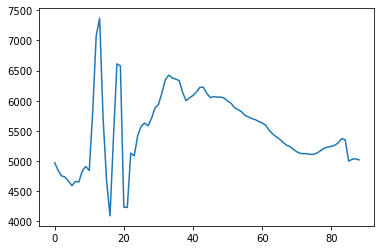

In [1158]:
plt.plot(data[99])

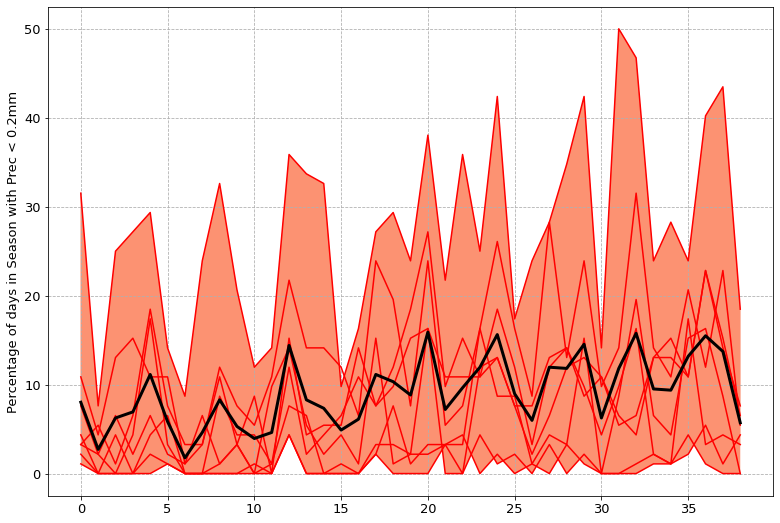

In [807]:
#Dürretage plotten
dür=pd.read_csv('/Users/weber-j/Documents/Drydays.txt',sep='\t')
fig=plt.figure(figsize=(13,9))
plt.plot(dür.Burundi/92*100,color='red')
#plt.plot(dür.Dschibuti/92*100)
#plt.plot(dür.Eritrea/92*100)
plt.plot(dür.Ethiopia/92*100,color='red')
plt.plot(dür.Kenia/92*100,color='red')
plt.plot(dür.Ruanda/92*100,color='red')
plt.plot(dür.Somalia/92*100,color='red')
#plt.plot(dür.Sudan/92*100,color='red')
plt.plot(dür.South_Sudan/92*100,color='red')
plt.plot(dür.Tanzania/92*100,color='red')
plt.plot(dür.Uganda/92*100,color='red')
plt.plot((dür.Burundi/92*100+dür.Ethiopia/92*100+dür.Kenia/92*100+dür.Ruanda/92*100+dür.Somalia/92*100+dür.South_Sudan/92*100+
          dür.Tanzania/92*100+dür.Uganda/92*100)/8,color='k',linewidth=3)
plt.ylabel('Percentage of days in Season with Prec < 0.2mm',size=13)
plt.xticks(size=13)
plt.yticks(size=13)
plt.grid(linestyle='--')
plt.fill_between(np.arange(0,39,1), dür.Somalia/92*100, dür.Uganda/92*100, facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1), dür.Somalia/92*100, dür.Tanzania/92*100, facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,39,1), dür.Somalia/92*100, dür.Ethiopia/92*100, facecolor='#fc9272', alpha=1)

In [ ]:
for Land in range (0,11):
    li=[]
    for yr in range (0,39-5):
        li.append(np.sum(getattr(dür,Länder[Land])[yr:yr+5])/5)
    globals()['fiveyr'+str(Land)]=li

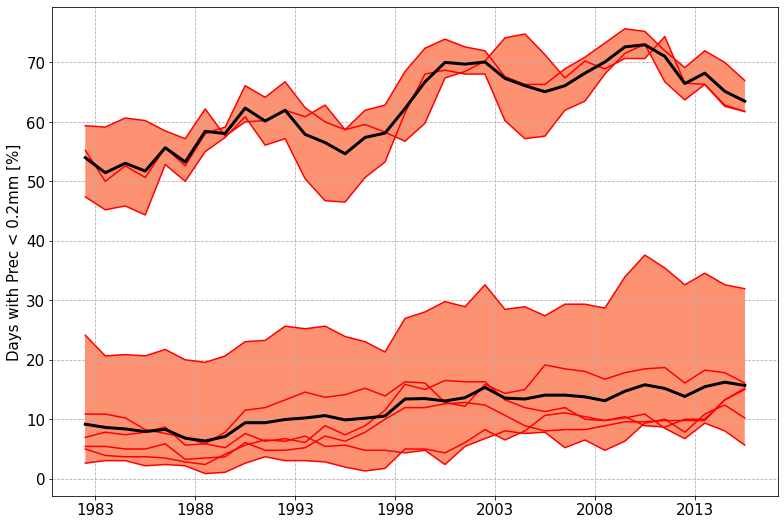

In [809]:
#Dürretage plotten 5-Jahres-Mittel (Fig. 5)
fig=plt.figure(figsize=(13,9))
plt.plot(np.asarray(fiveyr0)/92*100,color='red')
plt.plot(np.asarray(fiveyr1)/92*100,color='red')
plt.plot(np.asarray(fiveyr2)/92*100,color='red')
plt.plot(np.asarray(fiveyr3)/92*100,color='red')
plt.plot(np.asarray(fiveyr4)/92*100,color='red')
plt.plot(np.asarray(fiveyr5)/92*100,color='red')
plt.plot(np.asarray(fiveyr6)/92*100,color='red')
#plt.plot(np.asarray(fiveyr7)/92*100,color='red')
plt.plot(np.asarray(fiveyr8)/92*100,color='red')
plt.plot(np.asarray(fiveyr9)/92*100,color='red')
#plt.plot(np.asarray(fiveyr10)/92*100,color='red')
plt.plot((np.asarray(fiveyr1)/92*100+np.asarray(fiveyr2)/92*100+np.asarray(fiveyr9)/92*100)/3,color='k',linewidth=3)
plt.plot((np.asarray(fiveyr0)/92*100+np.asarray(fiveyr3)/92*100+np.asarray(fiveyr4)/92*100+np.asarray(fiveyr5)/92*100+
          np.asarray(fiveyr6)/92*100+np.asarray(fiveyr8)/92*100)/6,color='k',linewidth=3)
plt.ylabel('Days with Prec < 0.2mm [%]',size=15)
plt.xticks(size=15,ticks=np.arange(0.5,34.5,5),labels=np.arange(1983,2017,5))
plt.yticks(size=15)
plt.grid(linestyle='--')
plt.fill_between(np.arange(0,34,1), np.asarray(fiveyr1)/92*100, np.asarray(fiveyr2)/92*100, facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,34,1), np.asarray(fiveyr9)/92*100, np.asarray(fiveyr2)/92*100, facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,34,1), np.asarray(fiveyr4)/92*100, np.asarray(fiveyr6)/92*100, facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,34,1), np.asarray(fiveyr3)/92*100, np.asarray(fiveyr6)/92*100, facecolor='#fc9272', alpha=1)
plt.fill_between(np.arange(0,34,1), np.asarray(fiveyr0)/92*100, np.asarray(fiveyr6)/92*100, facecolor='#fc9272', alpha=1)

In [430]:
data2=pd.read_csv('/Users/weber-j/Documents/StartEnd.csv',sep=';',index_col=0)

In [431]:
data2

Burundi  Djibouti  Eritrea  Ethiopia  Kenya  Rwanda  Somalia  Tanzania  \
Value                                                                           
6.4        NaN       1.0      NaN       NaN    NaN     NaN      NaN       NaN   
22.0       NaN       1.0      NaN       NaN    NaN     NaN      NaN       NaN   
7.7        NaN       NaN      NaN       NaN    NaN     NaN      NaN       2.0   
5.1        NaN       NaN      NaN       NaN    NaN     NaN      NaN       2.0   
12.2       NaN       NaN      3.0       NaN    NaN     NaN      NaN       NaN   
42.0       NaN       NaN      3.0       NaN    NaN     NaN      NaN       NaN   
13.2       4.0       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
24.7       4.0       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
21.3       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
55.3       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
24.2       NaN       NaN      NaN       NaN    6.0     NaN      NaN       NaN   
29.9       NaN       NaN      NaN       NaN    6.0     NaN      NaN       NaN   
26.1       NaN       NaN      NaN       NaN    NaN     7.0      NaN       NaN   
36.2       NaN       NaN      NaN       NaN    NaN     7.0      NaN       NaN   
26.1       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
54.1       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
27.4       NaN       NaN      NaN       9.0    NaN     NaN      NaN       NaN   
43.4       NaN       NaN      NaN       9.0    NaN     NaN      NaN       NaN   
31.3       NaN       NaN      NaN       NaN    NaN     NaN     10.0       NaN   
41.9       NaN       NaN      NaN       NaN    NaN     NaN     10.0       NaN   
31.7       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
38.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
66.0       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
61.4       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
60.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
38.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
69.7       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
66.1       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
62.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
46.2       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
82.7       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
69.1       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
74.2       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
63.2       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
66.3       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
51.2       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
83.7       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
86.4       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
77.9       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
71.2       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
77.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
73.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
75.3       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   
63.6       NaN       NaN      NaN       NaN    NaN     NaN      NaN       NaN   

       South_Sudan  Sudan  ...  Djibouti_  Eritrea_  Ethiopia_  Kenya_  \
Value                      ...                                           
6.4            NaN    NaN  ...        NaN       NaN        NaN     NaN   
22.0           NaN    NaN  ...        NaN       NaN       

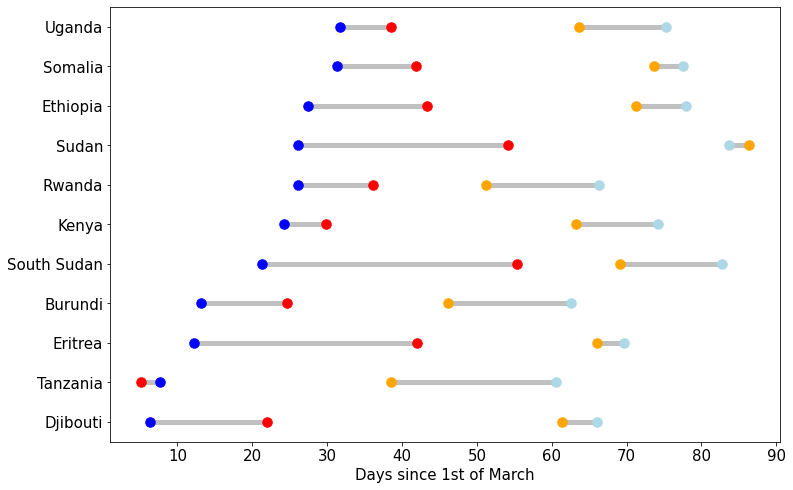

In [437]:
#Darstellung des Starts und des Endes der Regenzeit (Fig. 6)
fig=plt.figure(figsize=(12,8))

#Das ist ein von einem Scatterplot überlagerter Linienplot, um die Punkte zu verbinden
plt.plot(data2.Djibouti,color='silver',linewidth=5,)
plt.plot(data2.Tanzania,color='silver',linewidth=5,)
plt.plot(data2.Eritrea,color='silver',linewidth=5,)
plt.plot(data2.Burundi,color='silver',linewidth=5,)
plt.plot(data2.South_Sudan,color='silver',linewidth=5,)
plt.plot(data2.Kenya,color='silver',linewidth=5,)
plt.plot(data2.Rwanda,color='silver',linewidth=5,)
plt.plot(data2.Sudan,color='silver',linewidth=5,)
plt.plot(data2.Ethiopia,color='silver',linewidth=5,)
plt.plot(data2.Somalia,color='silver',linewidth=5,)
plt.plot(data2.Uganda,color='silver',linewidth=5,)
plt.plot(data2.Djibouti_,color='silver',linewidth=5,)
plt.plot(data2.Tanzania_,color='silver',linewidth=5,)
plt.plot(data2.Eritrea_,color='silver',linewidth=5,)
plt.plot(data2.Burundi_,color='silver',linewidth=5,)
plt.plot(data2.South_Sudan_,color='silver',linewidth=5,)
plt.plot(data2.Kenya_,color='silver',linewidth=5,)
plt.plot(data2.Rwanda_,color='silver',linewidth=5,)
plt.plot(data2.Sudan_,color='silver',linewidth=5,)
plt.plot(data2.Ethiopia_,color='silver',linewidth=5,)
plt.plot(data2.Somalia_,color='silver',linewidth=5,)
plt.plot(data2.Uganda_,color='silver',linewidth=5,)
plt.yticks(size=15,ticks=np.arange(1,12,1),labels=['Djibouti','Tanzania','Eritrea','Burundi','South Sudan','Kenya','Rwanda',
                                                   'Sudan','Ethiopia','Somalia','Uganda',])
plt.xticks(size=15)
plt.xlabel('Days since 1st of March',size=15) 
plt.scatter(data.Value[0],data.Djibouti[0],color='blue',s=90,zorder=3) #Die Punkte müssen einzeln dargestellt wwerden, nur so habe ich
plt.scatter(data.Value[1],data.Djibouti[1],color='red',s=90,zorder=3)  # die volle Kontrolle
plt.scatter(data.Value[4],data.Eritrea[4],color='blue',s=90,zorder=3)
plt.scatter(data.Value[5],data.Eritrea[5],color='red',s=90,zorder=3)
plt.scatter(data.Value[20],data.Uganda[20],color='blue',s=90,zorder=3)
plt.scatter(data.Value[21],data.Uganda[21],color='red',s=90,zorder=3)
plt.scatter(data.Value[6],data.Burundi[6],color='blue',s=90,zorder=3)
plt.scatter(data.Value[7],data.Burundi[7],color='red',s=90,zorder=3)
plt.scatter(data.Value[2],data.Tanzania[2],color='blue',s=90,zorder=3)
plt.scatter(data.Value[3],data.Tanzania[3],color='red',s=90,zorder=3)
plt.scatter(data.Value[12],data.Rwanda[12],color='blue',s=90,zorder=3)
plt.scatter(data.Value[13],data.Rwanda[13],color='red',s=90,zorder=3)
plt.scatter(data.Value[16],data.Ethiopia[16],color='blue',s=90,zorder=3)
plt.scatter(data.Value[17],data.Ethiopia[17],color='red',s=90,zorder=3)
plt.scatter(data.Value[10],data.Kenya[10],color='blue',s=90,zorder=3)
plt.scatter(data.Value[11],data.Kenya[11],color='red',s=90,zorder=3)
plt.scatter(data.Value[8],data.South_Sudan[8],color='blue',s=90,zorder=3)
plt.scatter(data.Value[9],data.South_Sudan[9],color='red',s=90,zorder=3)
plt.scatter(data.Value[18],data.Somalia[18],color='blue',s=90,zorder=3)
plt.scatter(data.Value[19],data.Somalia[19],color='red',s=90,zorder=3)
plt.scatter(data.Value[14],data.Sudan[14],color='blue',s=90,zorder=3)
plt.scatter(data.Value[15],data.Sudan[15],color='red',s=90,zorder=3)
plt.scatter(data.Value[0+22],data.Djibouti_[0+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[1+22],data.Djibouti_[1+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[4+22],data.Eritrea_[4+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[5+22],data.Eritrea_[5+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[20+22],data.Uganda_[20+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[21+22],data.Uganda_[21+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[6+22],data.Burundi_[6+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[7+22],data.Burundi_[7+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[2+22],data.Tanzania_[2+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[3+22],data.Tanzania_[3+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[12+22],data.Rwanda_[12+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[13+22],data.Rwanda_[13+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[16+22],data.Ethiopia_[16+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[17+22],data.Ethiopia_[17+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[10+22],data.Kenya_[10+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[11+22],data.Kenya_[11+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[8+22],data.South_Sudan_[8+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[9+22],data.South_Sudan_[9+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[18+22],data.Somalia_[18+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[19+22],data.Somalia_[19+22],color='orange',s=90,zorder=3)
plt.scatter(data.Value[14+22],data.Sudan_[14+22],color='lightblue',s=90,zorder=3)
plt.scatter(data.Value[15+22],data.Sudan_[15+22],color='orange',s=90,zorder=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be 

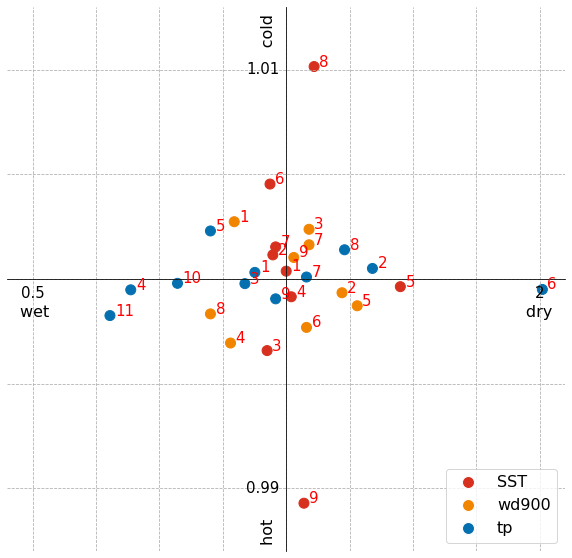

In [94]:
#Scatter Plot der DWI und DTI aller Cluster (Fig. 15)
import sys
sca=pd.read_csv('/Users/weber-j/Documents/tod2.csv',sep=';',index_col=None)
for lo in range (0,len(sca.Tp)):
    if sca.Tp[lo] < 1:
        sca.Tp[lo]=-1/sca.Tp[lo]+2
    if sca.t2m[lo] < 1:
        sca.t2m[lo]=-1/sca.t2m[lo]+2
        
col=['#d7301f','#d7301f','#d7301f','#d7301f','#d7301f','#d7301f','#d7301f','#d7301f','#d7301f','#f28500','#f28500','#f28500',
     '#f28500','#f28500','#f28500','#f28500','#f28500','#f28500','#0570b0','#0570b0','#0570b0','#0570b0','#0570b0','#0570b0',
     '#0570b0','#0570b0','#0570b0','#0570b0','#0570b0']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(sca.Tp,sca.t2m,marker='o',s=100,c=col)
plt.grid(linestyle='--')
plt.xlim(-0.1, 2.1)
plt.ylim(0.987, 1.013)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([0.99,0.99,'','','',1.01],fontsize=15,verticalalignment='center')
ax.set_xticklabels([0,0.5,'','','','','','','',2],fontsize=15,verticalalignment='top')
plt.xlabel('wet                                                                                             dry', fontsize=16)
plt.ylabel('hot                                                                                            cold', fontsize=16,
           labelpad=-30)

for i, txt in enumerate(sca.Cluster):
    ax.annotate(txt, (sca.Tp[i]+0.02, sca.t2m[i]),fontsize=15,color='red')
    
new0 = mlines.Line2D([0],[0],marker='o',color='w', label='SST',markerfacecolor='#d7301f',markersize=12)    #Legende kreieren
new1 = mlines.Line2D([0],[0],marker='o',color='w', label='wd900',markerfacecolor='#f28500',markersize=12)
new2 = mlines.Line2D([0],[0],marker='o',color='w', label='tp',markerfacecolor='#0570b0',markersize=12)
ax.legend(handles=[new0,new1,new2],prop={'size': 16},loc='lower right',ncol=1)


plt.show()

Text(0, 0.5, 'Temperature [°C]')

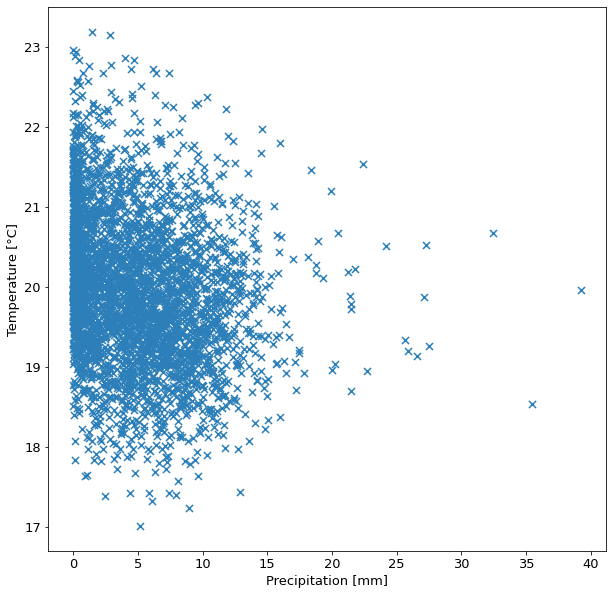

In [305]:
#Berechnung und Darstellung eines Beispiels zur Clusterung, verwendet in der Kolloquiumspräsentation
Cl=10 #Anzahl der Cluster
data=[np.asarray(dat.Burundi),np.asarray(dat.t2m_Burundi)]
daten=[]
for i in range(0,len(data[0])):
    daten.append([data[0][i],data[1][i],kmeans.labels_[i]])
kmeans = KMeans(n_clusters=Cl, random_state=0).fit(daten)
clustering = AgglomerativeClustering(n_clusters=Cl).fit(daten)
data=[np.asarray(dat.Burundi),np.asarray(dat.t2m_Burundi),np.asarray(kmeans.labels_)]

fig=plt.figure(figsize=(10,10))
plt.scatter(data[0],data[1],marker='x',s=50,c='#2c7fb8')
#plt.scatter(data[0],data[1],marker='x',s=50,c=clustering.labels_.astype(float))
#plt.scatter(data[0],data[1],marker='x',s=50,c=kmeans.labels_.astype(float))
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Precipitation [mm]',size=13)
plt.ylabel('Temperature [°C]',size=13)

In [143]:
bar=pd.read_csv('/Users/weber-j/Documents/Bar.csv',sep=';',index_col=None,header=None)

In [144]:
bar

0    1     2     3     4     5     6     7     8   9   ...    25    26  \
0   7 -9.3  88.6  19.2  14.5 -44.9 -49.9 -13.1  73.4   0  ...  26.7  39.8   

     27   28    29    30   31    32  33    34  
0 -15.2 -6.7  38.9 -29.1 -1.7  14.5 -16 -28.4  

[1 rows x 35 columns]

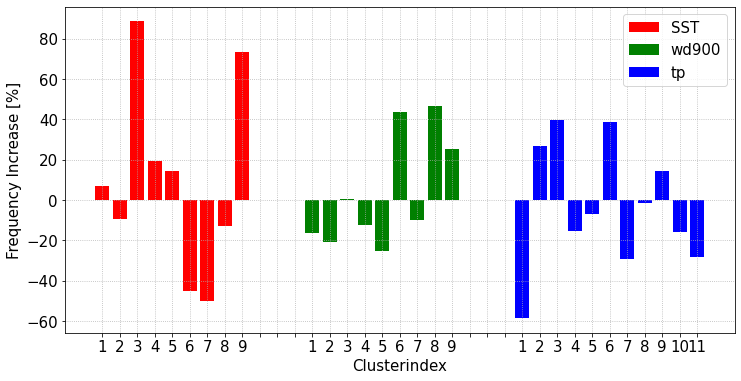

In [189]:
#Darstellung der Häufigkeit der Cluster, Fig. A2
fig=plt.figure(figsize=(12,6))
plt.bar(np.arange(0,9,1),height=la[0:9], color='red',label='SST')
plt.bar(np.arange(11,21,1),height=la[11:21], color='green',label='wd900')
plt.bar(np.arange(21,35,1),height=la[21:35], color='blue',label='tp')
plt.xlabel('Clusterindex',size=15)
plt.ylabel('Frequency Increase [%]',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
Label=(1,2,3,4,5,6,7,8,9,'','','',1,2,3,4,5,6,7,8,9,'','','',1,2,3,4,5,6,7,8,9,10,11)
plt.xticks(np.arange(0,35,1),Label,size=15)
plt.grid(linestyle=':')
plt.legend(fontsize=15)